**Report Title: Analyzing Global Protein Intake Trends: Correlations Between Economic and Various Indicators**
---



# Methodology



This project was created and implemented by a collaboration of Olga Vaisenberg and Kirill Zaiakin.
Main data sources:

https://www.fao.org/faostat/en/#data

https://www.globalhungerindex.org/

https://hdr.undp.org/

Protein and food supplies values - https://www.fao.org/faostat/en/#data/FBS

Population - https://www.fao.org/faostat/en/#data/OA

GDP and GNI - https://www.fao.org/faostat/en/#data/MK


#1. Executive Summary

# 2. Introduction



*   Background:
    - Importance of global nutrition trends and their impact on public health.
    - Role of economic indicators (GDP per capita, food prices) and various indices (HDI) in influencing protein intake.

*  Objectives:
    - Analyze global trends in protein intake.
    - Study correlations between protein supply and total food supply.
    - Conduct regional comparisons and study the relationship between protein intake and socioeconomic indicators.
    - Identify  drivers of protein supply trends.

*  Scope:
    - Focus on global data across multiple regions and years.
    - Integration of food supply data, protein intake, and economic and other
    indicators.

---



#3. Data

*  Data Sources:
  - FAO dataset: Protein supply quantity (g/capita/day), total food supply
  - Socioeconomic indicators: GDP, HDI (from World Bank, UNDP)
  - Regional and country-level breakdowns over multiple years

*   Data Preparation:
  - Filtering relevant indicators: Protein supply and total food supply
  - Merging datasets by country and year
  - Cleaning and handling missing or estimated values

* Exploratory Data Analysis (EDA):
  - Trend analysis: Global and regional protein supply
  - Correlation analysis: Relationship between protein intake, total food supply, GDP and GNI

* Predictive Modeling:
  - Linear regression and Random Forest models to predict protein intake trends.
  - Feature importance analysis to identify key drivers.

---



Data Preparation:
1. Creating DataSet for the countries for the protein intake:

In [ ]:
from google.colab import files
import pandas as pd
files.upload()
df1 = pd.read_csv('macro2021.csv')
df1.head()

Saving macro2021.csv to macro2021.csv


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2010,2010,USD,537.238236,X,Figure from international organizations,NaN
1,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2011,2011,USD,612.773225,X,Figure from international organizations,NaN
2,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2012,2012,USD,649.710978,X,Figure from international organizations,NaN
3,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2013,2013,USD,631.060444,X,Figure from international organizations,NaN
4,MK,Macro Indicators,4,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2014,2014,USD,596.048898,X,Figure from international organizations,NaN


In [ ]:
df1.columns = df1.columns.str.strip()
df1['Item'] = df1['Item'].str.strip()

df1_new = df1.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

# Flatten the column names
df1_new.columns.name = None

# Rename columns (optional)
df1_new.rename(
    columns={
        "Gross Domestic Product": "GDP",
        "Gross National Income": "GNI"
    },
    inplace=True
)
df1_new.head()

,Area,Year,GDP,GNI
0,Afghanistan,2010,537.238236,571.352591
1,Afghanistan,2011,612.773225,654.704840
2,Afghanistan,2012,649.710978,701.250123
3,Afghanistan,2013,631.060444,687.537464
4,Afghanistan,2014,596.048898,651.915127


In [ ]:
files.upload()
df2 = pd.read_csv('population2021.csv')
df2.head()

Saving population2021.csv to population2021.csv


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2010,2010,1000 No,28189.672,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2010,2010,1000 No,14240.377,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2010,2010,1000 No,13949.295,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2010,2010,1000 No,21966.187,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,2010,2010,1000 No,6836.980,X,Figure from international organizations,NaN


In [ ]:
files.upload()
df3 = pd.read_csv('protein2021.csv')
df3.head()

Saving protein2021.csv to protein2021.csv


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2901,Grand Total,2010,2010,kcal/cap/d,2208.00,E,Estimated value,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2010,2010,Kcal,22714261.33,E,Estimated value,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2901,Grand Total,2010,2010,g/cap/d,65.76,E,Estimated value,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,671,Protein supply quantity (t),S2901,Grand Total,2010,2010,t,676666.08,E,Estimated value,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2901,Grand Total,2011,2011,kcal/cap/d,2179.00,E,Estimated value,NaN


In [ ]:
dataframes = [df2, df3]

pivoted_dfs = [df.pivot(index=["Year", "Area"], columns="Element", values="Value") for df in dataframes]

merged_df = pd.concat(pivoted_dfs, axis=1).reset_index()

merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

print(merged_df)

Element  Year                       Area  Rural population  \
0        2010                Afghanistan         21966.187   
1        2010                    Albania          1406.665   
2        2010                    Algeria         11723.941   
3        2010             American Samoa             6.902   
4        2010                    Andorra             9.442   
...       ...                        ...               ...   
2821     2021  Wallis and Futuna Islands            11.494   
2822     2021             Western Sahara            80.102   
2823     2021                      Yemen         18995.833   
2824     2021                     Zambia         10542.189   
2825     2021                   Zimbabwe         12226.340   

Element  Total Population - Both sexes  Total Population - Female  \
0                            28189.672                  13949.295   
1                             2913.399                   1454.297   
2                            35856.344          

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826 entries, 0 to 2825
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    2826 non-null   int64  
 1   Area                                    2826 non-null   object 
 2   Rural population                        2804 non-null   float64
 3   Total Population - Both sexes           2814 non-null   float64
 4   Total Population - Female               2814 non-null   float64
 5   Total Population - Male                 2814 non-null   float64
 6   Urban population                        2804 non-null   float64
 7   Food supply (kcal)                      2195 non-null   float64
 8   Food supply (kcal/capita/day)           2194 non-null   float64
 9   Protein supply quantity (g/capita/day)  2194 non-null   float64
 10  Protein supply quantity (t)             2195 non-null   floa

In [ ]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    2535 non-null   object 
 1   Year    2535 non-null   int64  
 2   GDP     2535 non-null   float64
 3   GNI     2535 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 79.3+ KB


In [ ]:
print(set(merged_df['Area']).difference(set(df1_new['Area'])))
print(set(merged_df['Year']).difference(set(df1_new['Year'])))

{'mayotte', 'réunion', 'united states virgin islands', 'guam', 'saint helena, ascension and tristan da cunha', 'saint-martin (french part)', 'sudan (former)', 'wallis and futuna islands', 'american samoa', 'faroe islands', 'falkland islands (malvinas)', 'french guyana', 'tokelau', 'channel islands', 'gibraltar', 'bonaire, sint eustatius and saba', 'saint barthélemy', 'western sahara', 'holy see', 'guadeloupe', 'martinique', 'niue', 'northern mariana islands', 'china, taiwan province of', 'isle of man', 'saint pierre and miquelon'}
set()


In [ ]:
filtered_merged_df = merged_df[
    merged_df[['Year', 'Area']].apply(tuple, axis=1).isin(
        df1_new[['Year', 'Area']].apply(tuple, axis=1)
    )
]

df_countries = pd.merge(
    filtered_merged_df,
    df1_new,
    on=['Year', 'Area'],
    how='inner'
)

df_countries = df_countries.rename(columns={"Area": "Country"})

In [ ]:
df_countries['Food supply (kcal)'] = df_countries.groupby('Country')['Food supply (kcal)'].transform(lambda x: x.fillna(x.mean()))
df_countries['Food supply (kcal/capita/day)'] = df_countries.groupby('Country')['Food supply (kcal/capita/day)'].transform(lambda x: x.fillna(x.median()))
df_countries['Protein supply quantity (g/capita/day)'] = df_countries.groupby('Country')['Protein supply quantity (g/capita/day)'].transform(lambda x: x.fillna(x.mean()))
df_countries['Protein supply quantity (t)'] = df_countries.groupby('Country')['Protein supply quantity (t)'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    2527 non-null   int64  
 1   Country                                 2527 non-null   object 
 2   Rural population                        2527 non-null   float64
 3   Total Population - Both sexes           2527 non-null   float64
 4   Total Population - Female               2527 non-null   float64
 5   Total Population - Male                 2527 non-null   float64
 6   Urban population                        2527 non-null   float64
 7   Food supply (kcal)                      2527 non-null   float64
 8   Food supply (kcal/capita/day)           2527 non-null   float64
 9   Protein supply quantity (g/capita/day)  2527 non-null   float64
 10  Protein supply quantity (t)             2527 non-null   floa

In [ ]:
df_countries.head()

,Year,Country,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Food supply (kcal),Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Protein supply quantity (t),GDP,GNI
0,2010,afghanistan,21966.187,28189.672,13949.295,14240.377,6836.980,22714261.33,2208.0,65.76,676666.08,537.238236,571.352591
1,2010,albania,1406.665,2913.399,1454.297,1459.102,1533.860,3462616.71,3256.0,109.07,115984.93,4093.825900,4052.927488
2,2010,algeria,11723.941,35856.344,17573.708,18282.636,24393.696,42441385.13,3243.0,90.95,1190273.91,4495.921455,4493.635433
3,2010,andorra,9.442,71.519,35.212,36.307,75.007,0.00,0.0,0.00,0.00,48190.908728,48190.908728
4,2010,angola,9398.277,23364.185,11853.530,11510.656,13970.854,20665547.82,2423.0,48.08,409999.51,3586.663902,3234.342143


In [ ]:
df_countries.to_csv('cleaned_data_by_countries.csv', index = False)

Pairplot saved as 'pairplot_numerical_analysis_countries.png'.


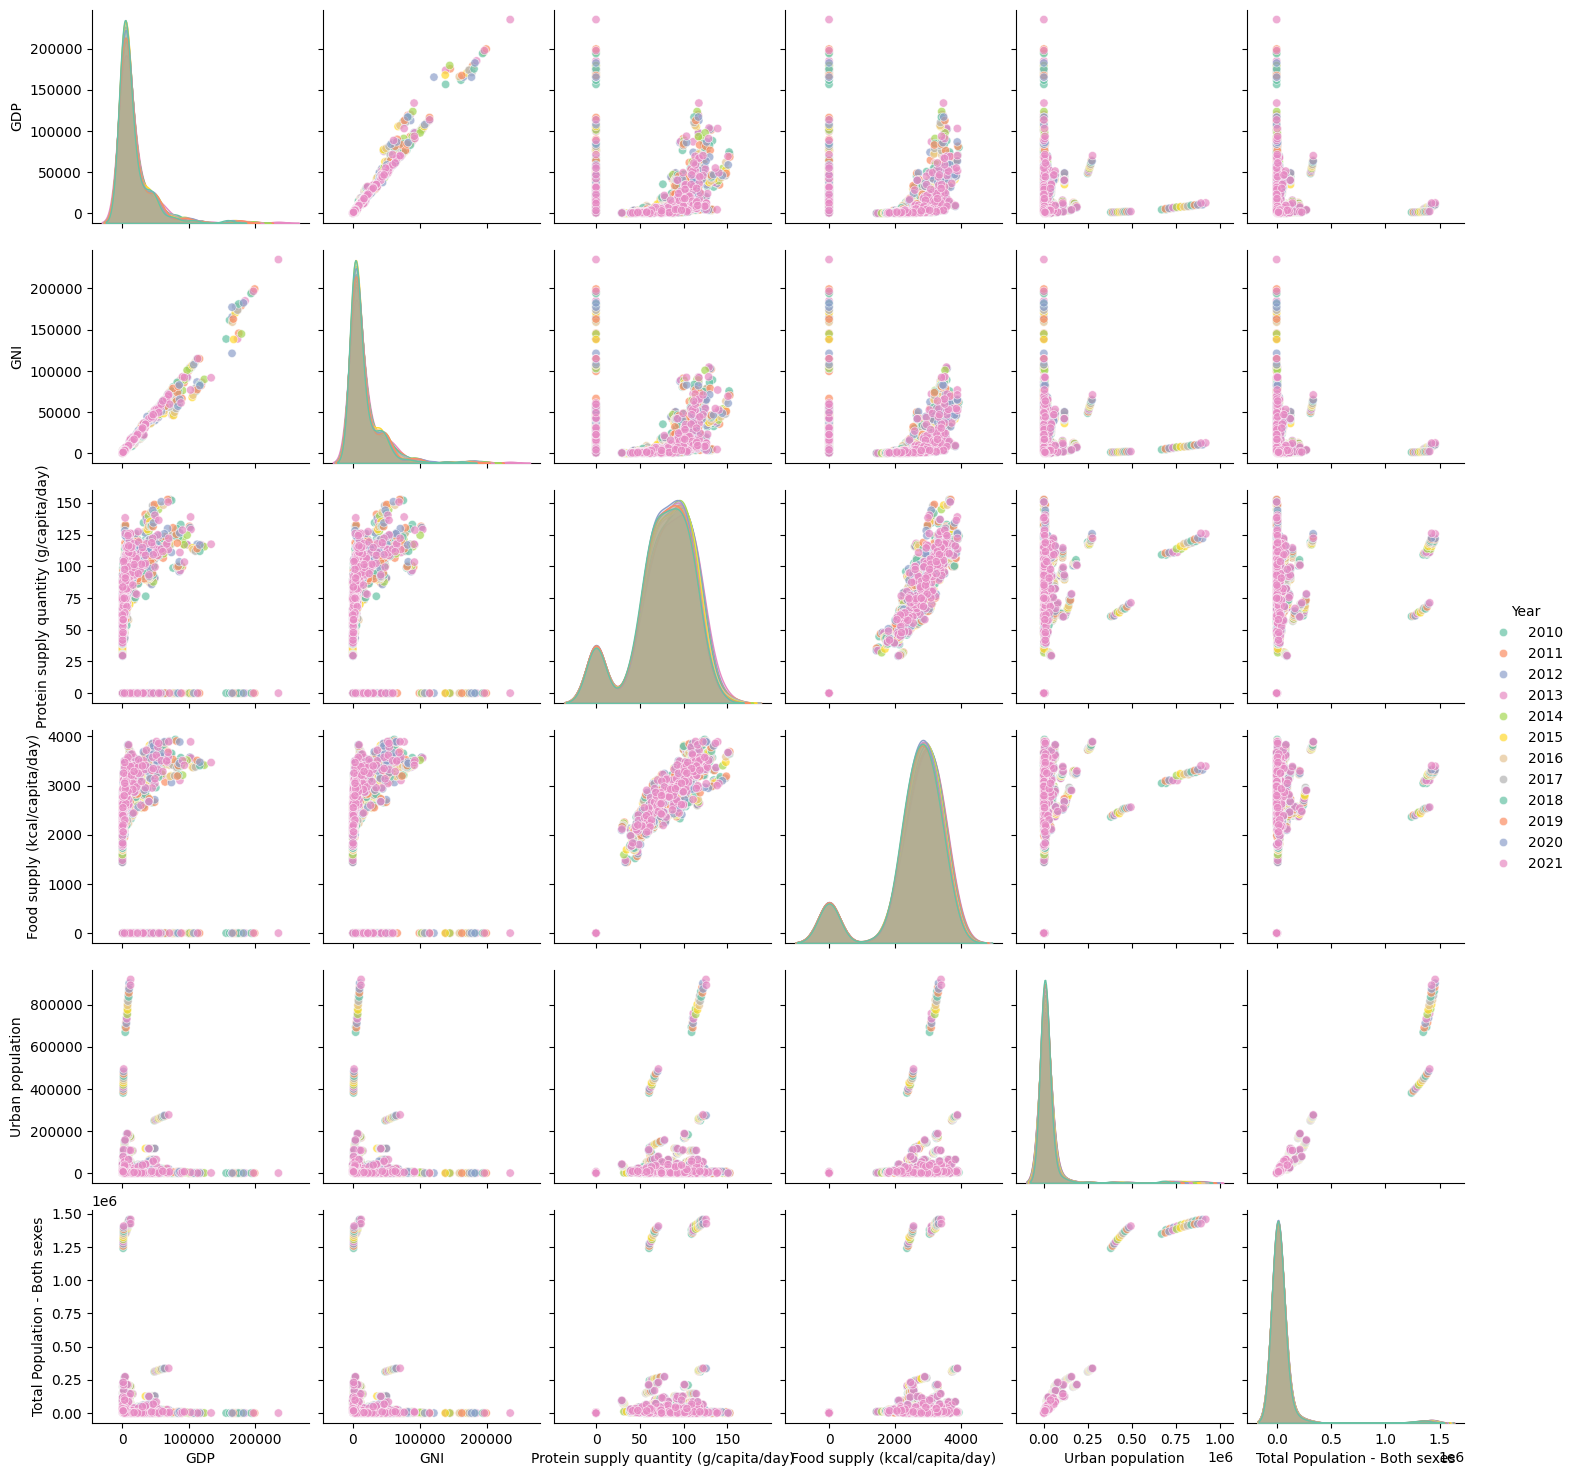

In [ ]:
# Save the pairplot as an image file
import seaborn as sns
sns.pairplot(
    df_countries,
    vars=[
        "GDP",
        "GNI",
        "Protein supply quantity (g/capita/day)",
        "Food supply (kcal/capita/day)",
        "Urban population",
        "Total Population - Both sexes"
    ],
    hue="Year",
    palette="Set2",
    diag_kind="kde",  # Kernel Density Estimate on diagonal
    plot_kws={'alpha': 0.7}  # Transparency for better visualization
).savefig('pairplot_numerical_analysis_countries.png')

print("Pairplot saved as 'pairplot_numerical_analysis_countries.png'.")

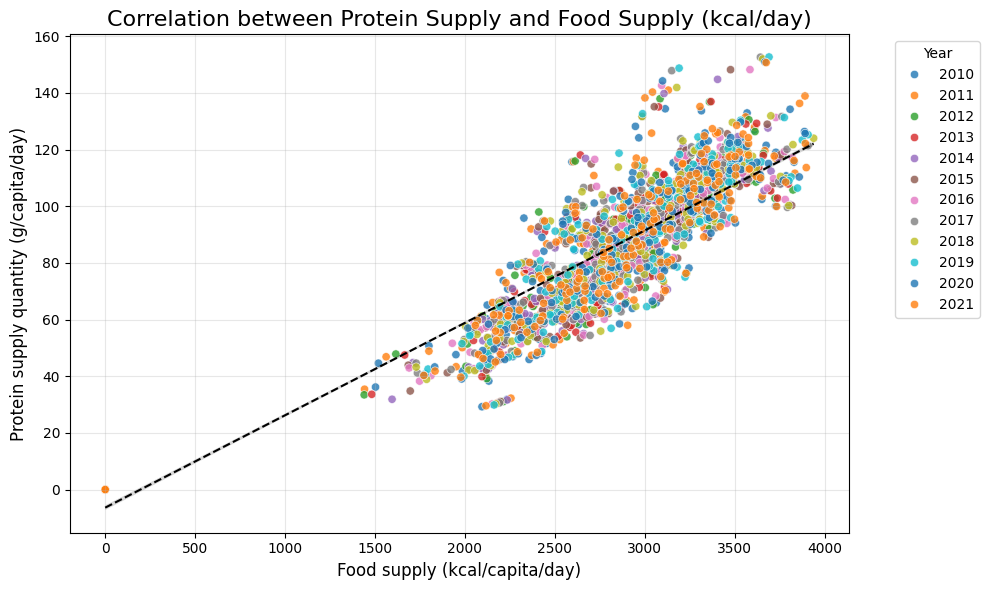

In [ ]:
import matplotlib.pyplot as plt

# Plot correlation between Food Supply (kcal/day) and Protein Supply (g/day)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_countries['Food supply (kcal/capita/day)'],
    y=df_countries['Protein supply quantity (g/capita/day)'],
    hue=df_countries['Year'],
    palette='tab10',
    alpha=0.8
)
sns.regplot(
    x=df_countries['Food supply (kcal/capita/day)'],
    y=df_countries['Protein supply quantity (g/capita/day)'],
    scatter=False,
    color='black',
    line_kws={"linestyle": "dashed", "linewidth": 1.5}
)
plt.title('Correlation between Protein Supply and Food Supply (kcal/day)', fontsize=16)
plt.xlabel('Food supply (kcal/capita/day)', fontsize=12)
plt.ylabel('Protein supply quantity (g/capita/day)', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
df_countries_cleaned = df_countries[df_countries["Protein supply quantity (g/capita/day)"] > 0]
color_scale = [
    [0, 'red'],        # 0 corresponds to red (lowest values)
    [0.5, 'yellow'],   # 0.5 corresponds to yellow (mid values)
    [1, 'green']       # 1 corresponds to green (highest values)
]

fig = px.choropleth(
    df_countries_cleaned,
    locations="Country",
    locationmode="country names",
    color="Protein supply quantity (g/capita/day)",
    hover_name="Country",
    color_continuous_scale=color_scale,
    range_color=[df_countries["Protein supply quantity (g/capita/day)"].min(), df_countries["Protein supply quantity (g/capita/day)"].max()],
    title="Choropleth Map of Protein supply by Country",
)

fig.update_layout(
    width=1000,  # Increase map width
    height=600,  # Increase map height
    coloraxis_colorbar=dict(
        tickfont=dict(size=10),  # Smaller font size for color bar labels
        tickmode='array',
        ticks="outside",  # Optionally move ticks outside the color bar
        thickness=15,  # Reduce color bar thickness
        len=0.8,  # Reduce the length of the color bar
    ),
    title_font=dict(size=20),  # Adjust title font size
    geo=dict(
        projection_scale=7,  # Adjust map scale for better view
        showcoastlines=True,
        coastlinecolor="Black",
    )
)


fig.show()

In [ ]:
worst_20_protein = df_countries_cleaned.groupby('Country')['Protein supply quantity (g/capita/day)'].mean().reset_index()
worst_20_protein = worst_20_protein.sort_values(by='Protein supply quantity (g/capita/day)', ascending=True).head(20)

fig = px.bar(worst_20_protein,
             x='Country',
             y='Protein supply quantity (g/capita/day)',
             title='Worst 20 Countries by Average Protein Intake (g/capita/day)',
             labels={'Protein supply quantity (g/capita/day)': 'Protein Supply (g/capita/day)', 'Country': 'Country'},
             color='Protein supply quantity (g/capita/day)',
             color_continuous_scale='YlOrRd'
            )

fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

In [ ]:
df_country_comparison = df_countries_cleaned.groupby('Country')[['GDP', 'Protein supply quantity (g/capita/day)']].mean().reset_index()
df_country_comparison['Protein supply group'] = pd.cut(df_country_comparison['Protein supply quantity (g/capita/day)'],
                                                       bins=5,
                                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

fig = px.scatter(df_country_comparison,
                 x='GDP',
                 y='Protein supply quantity (g/capita/day)',
                 color='Protein supply group',
                 title='GDP vs Protein Supply by Country',
                 labels={'GDP': 'Gross Domestic Product (USD)',
                         'Protein supply quantity (g/capita/day)': 'Protein Supply (g/capita/day)',
                         'Protein supply group': 'Protein Supply Group'},
                 color_discrete_map={'Very Low': 'red', 'Low': 'orange', 'Medium': 'yellow', 'High': 'green', 'Very High': 'blue'},  # Custom color map
                 hover_name='Country',
                 category_orders={'Protein supply group': ['Very Low', 'Low', 'Medium', 'High', 'Very High']}  # Order the groups in the legend
                )

fig.update_layout(
    title_x=0.5,
    xaxis_tickformat='$,.0f',
    xaxis_title='GDP (in USD)',
    yaxis_title='Protein Supply (g/capita/day)',
    showlegend=True
)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df_2016 = df_countries_cleaned[df_countries_cleaned['Year'] == 2016]
df_2021 = df_countries_cleaned[df_countries_cleaned['Year'] == 2021]

df_2016_summary = df_2016.groupby('Country').agg({
    'Protein supply quantity (g/capita/day)': 'sum',
    'Total Population - Both sexes': 'sum'
}).reset_index()

df_2016_summary['Total Protein Supply'] = df_2016_summary['Protein supply quantity (g/capita/day)'] * df_2016_summary['Total Population - Both sexes']

df_2021_summary = df_2021.groupby('Country').agg({
    'Protein supply quantity (g/capita/day)': 'sum',
    'Total Population - Both sexes': 'sum'
}).reset_index()

df_2021_summary['Total Protein Supply'] = df_2021_summary['Protein supply quantity (g/capita/day)'] * df_2021_summary['Total Population - Both sexes']

df_2016_top_20_worst = df_2016_summary.nsmallest(20, 'Total Protein Supply')
df_2021_top_20_worst = df_2021_summary.nsmallest(20, 'Total Protein Supply')

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Worst 20 Countries by Protein Supply (2016)", "Worst 20 Countries by Protein Supply (2021)"),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Bar chart for 2016
fig.add_trace(go.Bar(
    x=df_2016_top_20_worst['Country'],
    y=df_2016_top_20_worst['Total Protein Supply'],
    name='2016',
    marker=dict(color='red'),
), row=1, col=1)

# Bar chart for 2021
fig.add_trace(go.Bar(
    x=df_2021_top_20_worst['Country'],
    y=df_2021_top_20_worst['Total Protein Supply'],
    name='2021',
    marker=dict(color='blue'),
), row=1, col=2)

fig.update_layout(
    title_text="Worst 20 Countries by Protein Supply: 2016 vs 2021",
    showlegend=True,
    height=600,
)

# Rotate x-axis labels for both plots
fig.update_xaxes(tickangle=-45, row=1, col=1)
fig.update_xaxes(tickangle=-45, row=1, col=2)

fig.show()

# Data by regions



> Loading, cleaning, pivotting thr data and processing dataset on protein and food, targeting main element of the column['Element']



In [ ]:
import pandas as pd
from google.colab import files
files.upload()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

regions_protein = pd.read_csv('regions_protein.csv')  # Ensure the correct file path
regions_protein.rename(columns={"Area": "Region"}, inplace=True)  # Rename Area to Region

#Filtering relevant columns
filtered_data_regions = regions_protein[['Region', 'Year', 'Element', 'Value']]

#Pivoting the data
processed_proteins = filtered_data_regions.pivot_table(
    index=['Region', 'Year'],
    columns='Element',
    values='Value'
).reset_index()

#Flattenning the column names
processed_proteins.columns.name = None  # Removing hierarchy in column names

#Renaming the flattened column names
processed_proteins.rename(
    columns={
        "Food supply (kcal/capita/day)": "Food Supply (kcal/day)",
        "Protein supply quantity (g/capita/day)": "Protein Supply (g/day)",
        "Protein supply quantity (t)": "Protein Supply (tons)"
    },
    inplace=True
)
# Stripping whitespace from column names
processed_proteins.columns = processed_proteins.columns.str.strip()


# Saving the processed dataset
processed_file_path = 'processed_protein.csv'
processed_proteins.to_csv(processed_file_path, index=False)
print(processed_proteins.head())







Saving regions_protein.csv to regions_protein (1).csv
   Region  Year  Food supply (kcal)  Food Supply (kcal/day)  \
0  Africa  2010        9.400925e+08                  2560.0   
1  Africa  2011        9.663966e+08                  2565.0   
2  Africa  2012        1.027158e+09                  2572.0   
3  Africa  2013        1.054210e+09                  2572.0   
4  Africa  2014        1.084560e+09                  2577.0   

   Protein Supply (g/day)  Protein Supply (tons)  
0                   66.69            24488717.65  
1                   66.71            25132849.78  
2                   67.46            26940470.55  
3                   67.33            27594605.38  
4                   67.57            28433189.14  


In [ ]:
processed_proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  91 non-null     object 
 1   Year                    91 non-null     int64  
 2   Food supply (kcal)      91 non-null     float64
 3   Food Supply (kcal/day)  91 non-null     float64
 4   Protein Supply (g/day)  91 non-null     float64
 5   Protein Supply (tons)   91 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.4+ KB




> Loading the dataset on popullation proccessing it targetting values on population, versifying it male and female, as well as rural and urban



In [ ]:
files.upload()
regions_population = pd.read_csv('regions_population.csv')
regions_population.rename(columns={"Area": "Region"}, inplace=True)

regions_population.head()
regions_population.tail()

Saving regions_population.csv to regions_population.csv


,Domain Code,Domain,Area Code (M49),Region,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
415,OA,Annual population,9,Oceania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2021,2021,1000 No,44491.724,X,Figure from international organizations,NaN
416,OA,Annual population,9,Oceania,512,Total Population - Male,3010,Population - Est. & Proj.,2021,2021,1000 No,22307.798,X,Figure from international organizations,NaN
417,OA,Annual population,9,Oceania,513,Total Population - Female,3010,Population - Est. & Proj.,2021,2021,1000 No,22183.927,X,Figure from international organizations,NaN
418,OA,Annual population,9,Oceania,551,Rural population,3010,Population - Est. & Proj.,2021,2021,1000 No,13623.859,X,Figure from international organizations,NaN
419,OA,Annual population,9,Oceania,561,Urban population,3010,Population - Est. & Proj.,2021,2021,1000 No,29309.513,X,Figure from international organizations,NaN


In [ ]:
regions_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       420 non-null    object 
 1   Domain            420 non-null    object 
 2   Area Code (M49)   420 non-null    int64  
 3   Region            420 non-null    object 
 4   Element Code      420 non-null    int64  
 5   Element           420 non-null    object 
 6   Item Code         420 non-null    int64  
 7   Item              420 non-null    object 
 8   Year Code         420 non-null    int64  
 9   Year              420 non-null    int64  
 10  Unit              420 non-null    object 
 11  Value             420 non-null    float64
 12  Flag              420 non-null    object 
 13  Flag Description  420 non-null    object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 49.3+ KB


In [ ]:
filtered_data_regions_pop = regions_population[['Region', 'Year', 'Element', 'Value']]

processed_population = filtered_data_regions_pop.pivot_table(
    index=['Region', 'Year'],
    columns='Element',
    values='Value'
).reset_index()

processed_population.columns.name = None

processed_population.rename(
    columns={
        "Total Population - Both sexes": "Population",
        "Total Population - Male": "Male_population",
        "Total Population - Female": "Female_population",
        "Rural population": "Rural_population",
        "Urban population": "Urban_population"
    },
    inplace=True
)

processed_population.columns = processed_population.columns.str.strip()

processed_file_path = 'processed_population.csv'
processed_population.to_csv(processed_file_path, index=False)

print(processed_population.head())
print(processed_population.tail())
print(processed_population.info())


   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  
0       525866.141        408587.045  
1       539676.242        424130.040  
2       553822.180        440145.195  
3       568590.645        456734.381  
4       583740.913        473878.136  
           Region  Year  Rural_population  Population  Female_population  \
79  South America  2017         68168.762  420982.586         213020.461   
80  South America  2018         67887.786  424740.675         214961.140   
81  South America  2019         67584.109  428318.159         216817.124   
82  South America  2020         67258.166  4315



> Loading datasets precessed_protein and processed_population on [Region] and [Year] using inner join



In [ ]:
processed_proteins = pd.read_csv('processed_protein.csv')
processed_population = pd.read_csv('processed_population.csv')

# Merging the two datasets on 'Region' and 'Year'
merged_data = pd.merge(
    processed_population,
    processed_proteins,
    on=['Region', 'Year'],
    how='inner'  # Useing 'inner' join to keep only matching rows
)

# Saving the merged dataset
merged_file_path = 'merged_population_proteins.csv'
merged_data.to_csv(merged_file_path, index=False)

print(merged_data.head())
print(f"Merged dataset saved to {merged_file_path}")
print(merged_data.info())
print(merged_data['Region'].unique())


   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  
0                  2560.0                   66.69            24488717.65  
1                  2565.0                   66.71            25132849.78  



> Extracting the number of Undernurished people and introducing a new feature of Undernourishment_Scale



In [ ]:
from google.colab import files
files.upload()
undernurished_regions = pd.read_csv('undernurished_regions.csv')


Saving undernurished_regions.csv to undernurished_regions.csv


In [ ]:
undernurished_regions.rename(columns={"Area": "Region", "Value": "Undernourished_People"}, inplace=True)
undernurished_regions['Undernourished_People'] = undernurished_regions['Undernourished_People'].ffill()

cleaned_undernurished_regions = undernurished_regions[['Region', 'Year', 'Undernourished_People']].copy()


def categorize_undernourishment(value):
    if value <= 10:  # ≤ 10 million
        return "Low"
    elif 10 < value <= 50:  # 10–50 million
        return "Moderate"
    elif 50 < value <= 100:  # 50–100 million
        return "High"
    else:  # > 100 million
        return "Severe"

cleaned_undernurished_regions['Undernourishment_Scale'] = cleaned_undernurished_regions['Undernourished_People'].apply(categorize_undernourishment)

cleaned_file_path = 'cleaned_undernourished_regions_with_scale.csv'
cleaned_undernurished_regions.to_csv(cleaned_file_path, index=False)


print(cleaned_undernurished_regions.head())
print(f"Cleaned dataset saved to {cleaned_file_path}")
print(cleaned_undernurished_regions['Undernourishment_Scale'].unique)






   Region  Year  Undernourished_People Undernourishment_Scale
0  Africa  2010                  167.4                 Severe
1  Africa  2011                  169.0                 Severe
2  Africa  2012                  171.1                 Severe
3  Africa  2013                  176.1                 Severe
4  Africa  2014                  181.4                 Severe
Cleaned dataset saved to cleaned_undernourished_regions_with_scale.csv
<bound method Series.unique of 0     Severe
1     Severe
2     Severe
3     Severe
4     Severe
       ...  
79       Low
80       Low
81       Low
82       Low
83       Low
Name: Undernourishment_Scale, Length: 84, dtype: object>




> Merging the data from undernurshed_regions



In [ ]:
merged_population_proteins = pd.read_csv('merged_population_proteins.csv')

cleaned_undernurished_regions = pd.read_csv('cleaned_undernourished_regions_with_scale.csv')

final_merged_data = pd.merge(
    merged_population_proteins,
    cleaned_undernurished_regions,
    on=['Region', 'Year'],
    how='inner'
)

final_merged_file_path = 'final_merged_dataset.csv'
final_merged_data.to_csv(final_merged_file_path, index=False)

print(final_merged_data.head())
print(final_merged_data.info())
print(f"Final merged dataset saved to {final_merged_file_path}")


   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  \
0                  2560.0                   66.69            24488717.65   
1                  2565.0                   66.71            25132849.78



>Scrapping indecies : such as GDP and GNI



In [ ]:

files.upload()
regions_macro = pd.read_csv('macro_regions.csv')  # Ensure the correct file path
regions_macro.rename(columns={"Area": "Region"}, inplace=True)  # Rename Area to Region

Saving macro_regions.csv to macro_regions.csv


In [ ]:
regions_macro.head()
unique_elements = regions_macro['Element'].unique().tolist()
print(unique_elements)
regions_macro.head()
unique_elements = regions_macro['Item'].unique().tolist()
print(unique_elements)
print(regions_macro.columns)


['Value US$ per capita']
['Gross Domestic Product', 'Gross National Income']
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Region', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [ ]:
regions_macro.columns = regions_macro.columns.str.strip()
regions_macro['Item'] = regions_macro['Item'].str.strip()

filtered_data_macro = regions_macro[['Region', 'Year', 'Item', 'Value']]

processed_regions_macro = filtered_data_macro.pivot_table(
    index=['Region', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

processed_regions_macro.columns.name = None
processed_regions_macro.rename(
    columns={
        "Gross Domestic Product": "GDP",
        "Gross National Income": "GNI"
    },
    inplace=True
)
processed_file_path = 'processed_regions_macro.csv'
processed_regions_macro.to_csv(processed_file_path, index=False)

print(processed_regions_macro.head())
print(f"Processed dataset saved to {processed_file_path}")
print(processed_regions_macro.info())






   Region  Year          GDP          GNI
0  Africa  2010  1943.618265  1887.636832
1  Africa  2011  2113.039197  2039.685687
2  Africa  2012  2208.155882  2138.180600
3  Africa  2013  2213.490703  2137.481104
4  Africa  2014  2271.002854  2204.494279
Processed dataset saved to processed_regions_macro.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  84 non-null     object 
 1   Year    84 non-null     int64  
 2   GDP     84 non-null     float64
 3   GNI     84 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB
None




> Final merge into collected dataset by regions: Africa, North America, Central America, South America, Asia, Europe, Oceania



In [ ]:
collected_data = pd.merge(
    final_merged_data,
    processed_regions_macro,
    on=['Region', 'Year'],
    how='inner',
    suffixes=('_final', '_macro')
)

collected_data_file_path = 'collected_data.csv'
collected_data.to_csv(collected_data_file_path, index=False)

print("First few rows of the merged dataset:")
print(collected_data.head())

print("\nDataset Info:")
print(collected_data.info())

print(f"\nFinal merged dataset saved to {collected_data_file_path}")



First few rows of the merged dataset:
   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  \
0                  2560.0                   66.69            24488717.65   
1                  2565.0         

#4. Global Trends in Protein Intake
  - Yearly trends in global protein supply.
  - Comparison of protein intake with total food supply.

---

Pairplot saved as 'pairplot_numerical_analysis.png'.


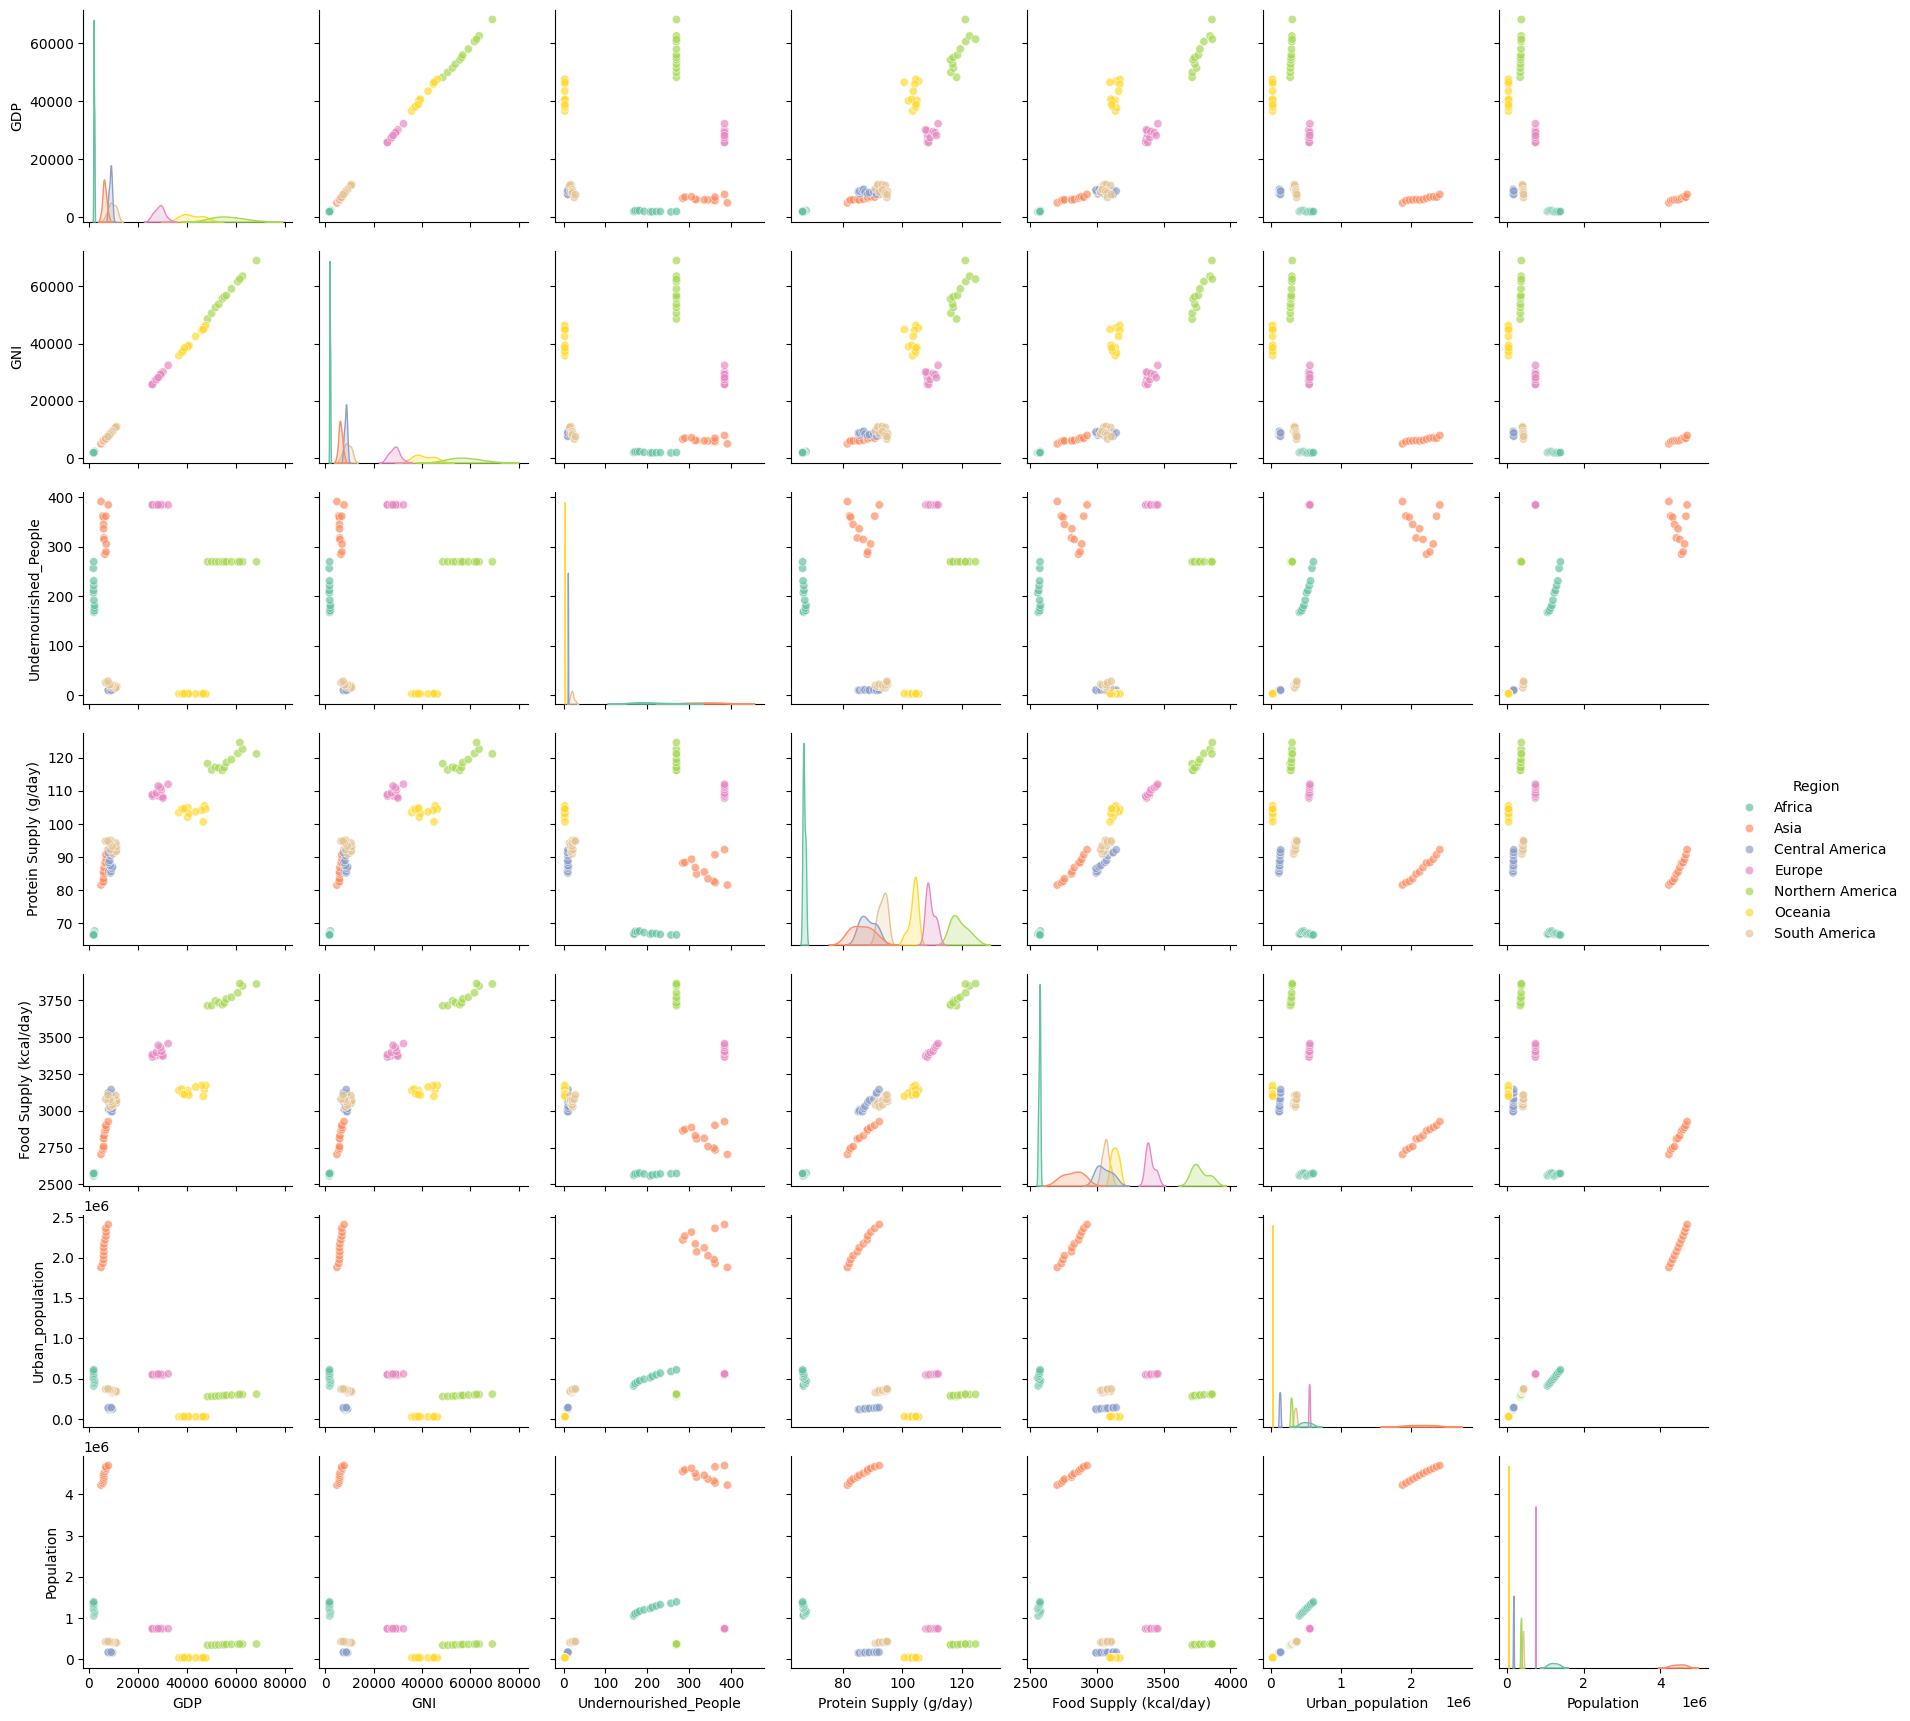

In [ ]:

sns.pairplot(
    collected_data,
    vars=[
        "GDP",
        "GNI",
        "Undernourished_People",
        "Protein Supply (g/day)",
        "Food Supply (kcal/day)",
        "Urban_population",
        "Population"
    ],
    hue="Region",
    palette="Set2",
    diag_kind="kde",  # Kernel Density Estimate on diagonal
    plot_kws={'alpha': 0.7}
).savefig('pairplot_numerical_analysis.png')

print("Pairplot saved as 'pairplot_numerical_analysis.png'.")


In [ ]:
regional_corr = processed_proteins.groupby('Region')[
    ['Food Supply (kcal/day)', 'Protein Supply (g/day)']
].corr().unstack().iloc[:, 1]
print(regional_corr)


Region
Africa              0.367728
Asia                0.989536
Central America     0.985806
Europe              0.973966
Northern America    0.922145
Oceania             0.593278
South America       0.739709
Name: (Food Supply (kcal/day), Protein Supply (g/day)), dtype: float64


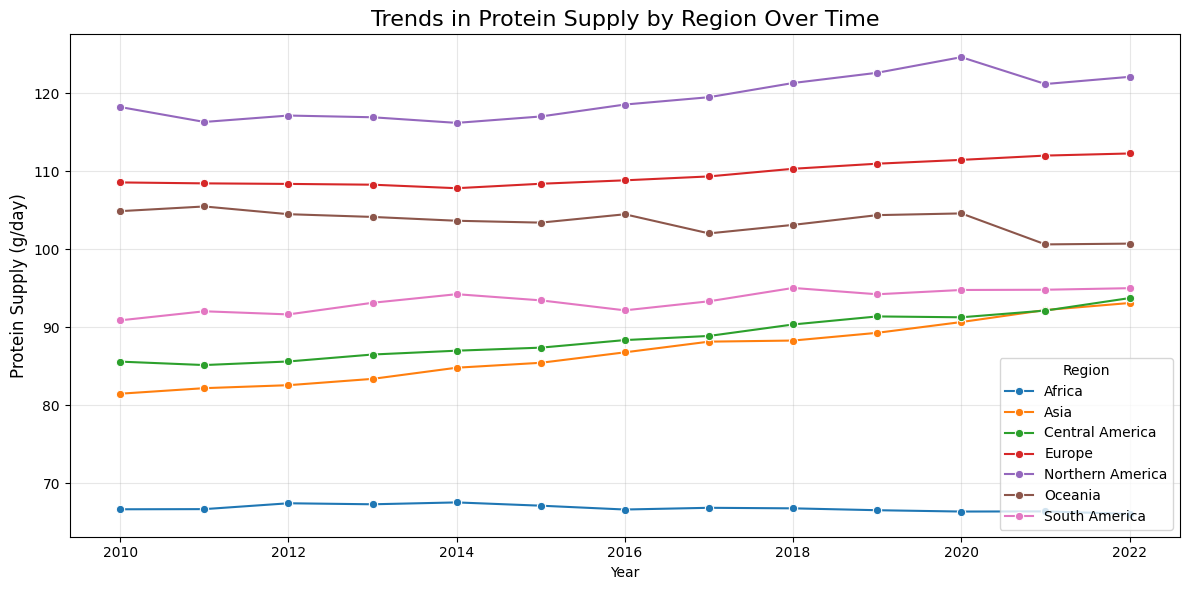

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=processed_proteins, x='Year', y='Protein Supply (g/day)', hue='Region', marker='o')
plt.title('Trends in Protein Supply by Region Over Time', fontsize=16)
plt.ylabel('Protein Supply (g/day)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


bar top 20



In [ ]:
import plotly.express as px
top_20_protein = df_countries.groupby('Country')['Protein supply quantity (g/capita/day)'].mean().reset_index()
top_20_protein = top_20_protein.sort_values(by='Protein supply quantity (g/capita/day)', ascending=False).head(20)

fig = px.bar(top_20_protein,
             x='Country',
             y='Protein supply quantity (g/capita/day)',
             title='Top 20 Countries by Average Protein Intake (g/capita/day)',
             labels={'Protein supply quantity (g/capita/day)': 'Protein Supply (g/capita/day)', 'Country': 'Country'},
             color='Protein supply quantity (g/capita/day)',
             color_continuous_scale='Viridis'
            )

fig.update_layout(xaxis_tickangle=-70, showlegend=False)
fig.show()

# 5.  Regional Comparisons


*  Regional Trends of undernurishment over 11 years
*  Food Supply by regions over the years
*  Regional Trends in Protein intake over the years
*  Urbanization Effect on Food Supply and Protein Intake
*  Reginal Disparities in GDP and GNI

---








In [ ]:
import pandas as pd

from google.colab import files
files.upload()
collected_data = pd.read_csv('collected_data.csv')

Saving collected_data.csv to collected_data (1).csv


In [ ]:
print(collected_data.head())

   Region  Year  Rural_population   Population  Female_population  \
0  Africa  2010        640859.299  1055233.393         529367.256   
1  Africa  2011        652803.773  1082675.797         542999.555   
2  Africa  2012        665140.073  1110797.233         556975.054   
3  Africa  2013        677663.811  1140180.579         571589.936   
4  Africa  2014        690251.653  1170299.019         586558.108   

   Male_population  Urban_population  Food supply (kcal)  \
0       525866.141        408587.045        9.400925e+08   
1       539676.242        424130.040        9.663966e+08   
2       553822.180        440145.195        1.027158e+09   
3       568590.645        456734.381        1.054210e+09   
4       583740.913        473878.136        1.084560e+09   

   Food Supply (kcal/day)  Protein Supply (g/day)  Protein Supply (tons)  \
0                  2560.0                   66.69            24488717.65   
1                  2565.0                   66.71            25132849.78

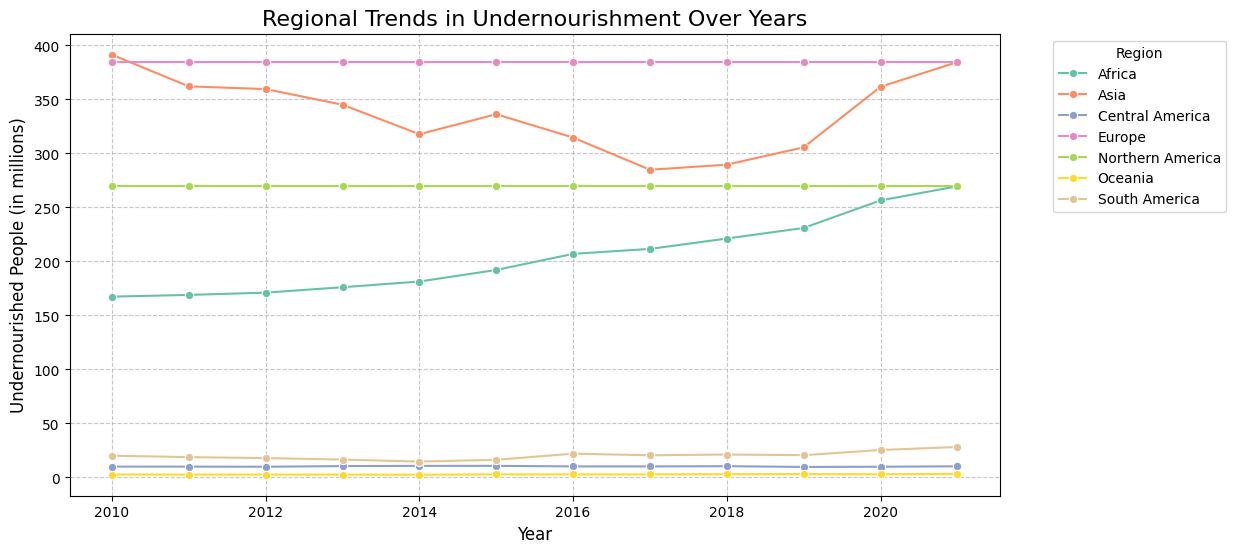

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for regional trends in undernourishment over years
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=collected_data,
    x="Year",
    y="Undernourished_People",
    hue="Region",
    marker="o",
    palette="Set2"
)
plt.title("Regional Trends in Undernourishment Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Undernourished People (in millions)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Plot saved as 'food_supply_trends.png'.


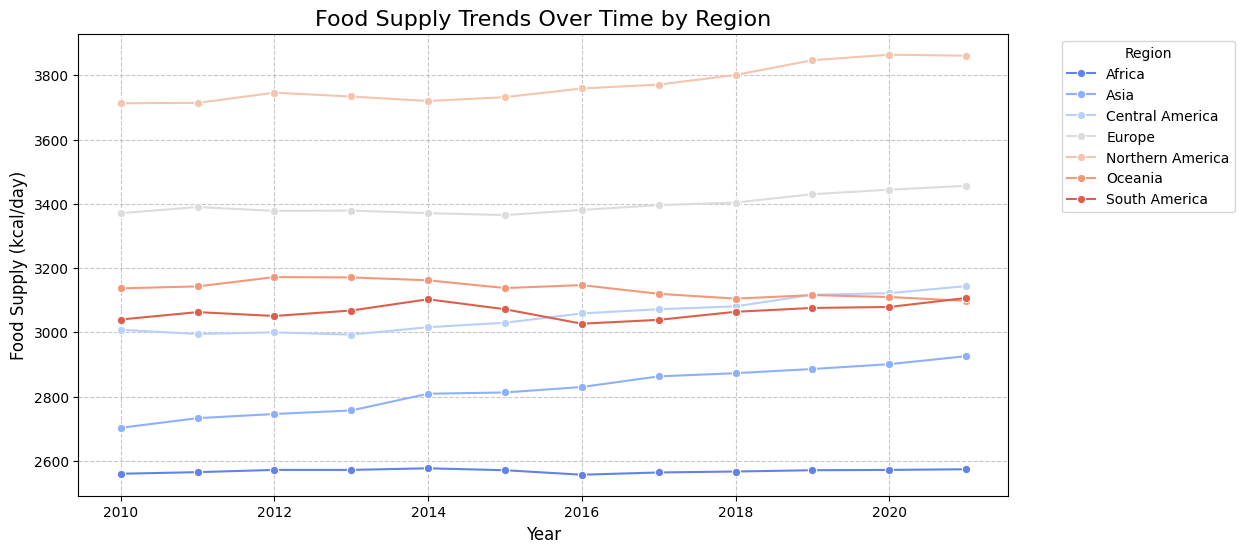

In [ ]:
# Save the plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=collected_data,
    x="Year",
    y="Food Supply (kcal/day)",
    hue="Region",
    marker="o",
    palette="coolwarm"
)
plt.title("Food Supply Trends Over Time by Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Food Supply (kcal/day)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("food_supply_trends.png")
print("Plot saved as 'food_supply_trends.png'.")


In [ ]:
import plotly.express as px

# Line plot for regional trends in protein intake using Plotly
fig = px.line(
    collected_data,
    x="Year",
    y="Protein Supply (g/day)",
    color="Region",
    markers=True,
    title="Regional Trends in Protein Intake Over Time",
    labels={
        "Year": "Year",
        "Protein Supply (g/day)": "Protein Supply (g/day)",
        "Region": "Region"
    }
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    xaxis_title="Year",
    yaxis_title="Protein Supply (g/day)",
    legend_title="Region",
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    template="plotly_white"
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Scatter plot: Urbanization effects on Food Supply
fig_food_supply = px.scatter(
    collected_data,
    x="Urban_population",
    y="Food Supply (kcal/day)",
    size="Population",
    color="Region",
    title="Urbanization Effects on Food Supply",
    labels={
        "Urban_population": "Urban Population",
        "Food Supply (kcal/day)": "Food Supply (kcal/day)"
    },
    hover_name="Region",
    size_max=60
)
fig_food_supply.update_layout(
    title_font_size=18,
    xaxis_title="Urban Population",
    yaxis_title="Food Supply (kcal/day)",
    legend_title="Region",
    template="plotly_white"
)
fig_food_supply.show()

# Save Food Supply plot
fig_food_supply.write_html("urbanization_food_supply.html")
print("Food Supply plot saved as 'urbanization_food_supply.html'.")

# Scatter plot: Urbanization effects on Protein Supply
fig_protein_supply = px.scatter(
    collected_data,
    x="Urban_population",
    y="Protein Supply (g/day)",
    size="Population",
    color="Region",
    title="Urbanization Effects on Protein Supply",
    labels={
        "Urban_population": "Urban Population",
        "Protein Supply (g/day)": "Protein Supply (g/day)"
    },
    hover_name="Region",
    size_max=60
)
fig_protein_supply.update_layout(
    title_font_size=18,
    xaxis_title="Urban Population",
    yaxis_title="Protein Supply (g/day)",
    legend_title="Region",
    template="plotly_white"
)
fig_protein_supply.show()

# Save Protein Supply plot
fig_protein_supply.write_html("urbanization_protein_supply.html")
print("Protein Supply plot saved as 'urbanization_protein_supply.html'.")


Food Supply plot saved as 'urbanization_food_supply.html'.


Protein Supply plot saved as 'urbanization_protein_supply.html'.




> Calculating the ratio of rural/urban population and visialsing a scatter plot v protein supply



In [ ]:
import plotly.express as px

# Calculating the ratio of rural to urban population
collected_data['Rural_to_Urban_Ratio'] = collected_data['Rural_population'] / collected_data['Urban_population']


fig_rural_urban_protein = px.scatter(
    collected_data,
    x="Rural_to_Urban_Ratio",
    y="Protein Supply (g/day)",
    size="Population",
    color="Region",
    title="Protein Intake vs. Rural to Urban Population Ratio",
    labels={
        "Rural_to_Urban_Ratio": "Rural to Urban Population Ratio",
        "Protein Supply (g/day)": "Protein Supply (g/day)"
    },
    hover_name="Region",
    size_max=60
)


fig_rural_urban_protein.update_layout(
    title_font_size=18,
    xaxis_title="Rural to Urban Population Ratio",
    yaxis_title="Protein Supply (g/day)",
    legend_title="Region",
    template="plotly_white"
)

# Show the plot
fig_rural_urban_protein.show()

# Save the plot as an HTML file
fig_rural_urban_protein.write_html("rural_urban_protein_analysis.html")
print("Plot saved as 'rural_urban_protein_analysis.html'.")


Plot saved as 'rural_urban_protein_analysis.html'.




> Rginal Disparities in GDP and GNI



In [ ]:
import plotly.express as px

# Analyze Regional Disparities in GDP
fig_gdp = px.box(
    collected_data,
    x="Region",
    y="GDP",
    color="Region",
    title="Regional Disparities in GDP",
    labels={"GDP": "GDP (per capita)"},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize layout for GDP
fig_gdp.update_layout(
    xaxis_title="Region",
    yaxis_title="GDP (per capita)",
    title_font_size=16,
    font=dict(size=12),
    showlegend=False,
    boxmode="group"  # Grouped view of the boxplots
)

# Show GDP plot
fig_gdp.show()

# Analyze Regional Disparities in GNI
fig_gni = px.box(
    collected_data,
    x="Region",
    y="GNI",
    color="Region",
    title="Regional Disparities in GNI",
    labels={"GNI": "GNI (per capita)"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout for GNI
fig_gni.update_layout(
    xaxis_title="Region",
    yaxis_title="GNI (per capita)",
    title_font_size=16,
    font=dict(size=12),
    showlegend=False,
    boxmode="group"  # Grouped view of the boxplots
)

# Show GNI plot
fig_gni.show()

# 6. Correlation Analysis



*   Calculating Urbanization effect correlations.
*   Correlation between protein supply and total food supply
*   Correlation Between Food Supply and Protein Supply Across Regions
*   Analyzing regional disparities in Protein Supply (g/day)
*   Relationships with GDP
  - Does higher GDP correlate with better protein supply
  - Regional Disparities in GDP and GNI
  - Correlation Between Protein Supply and Metrics (Undernourished People, GDP, GNI
---









> Correlation Matrix: Urbanization Effects on Key Metrics



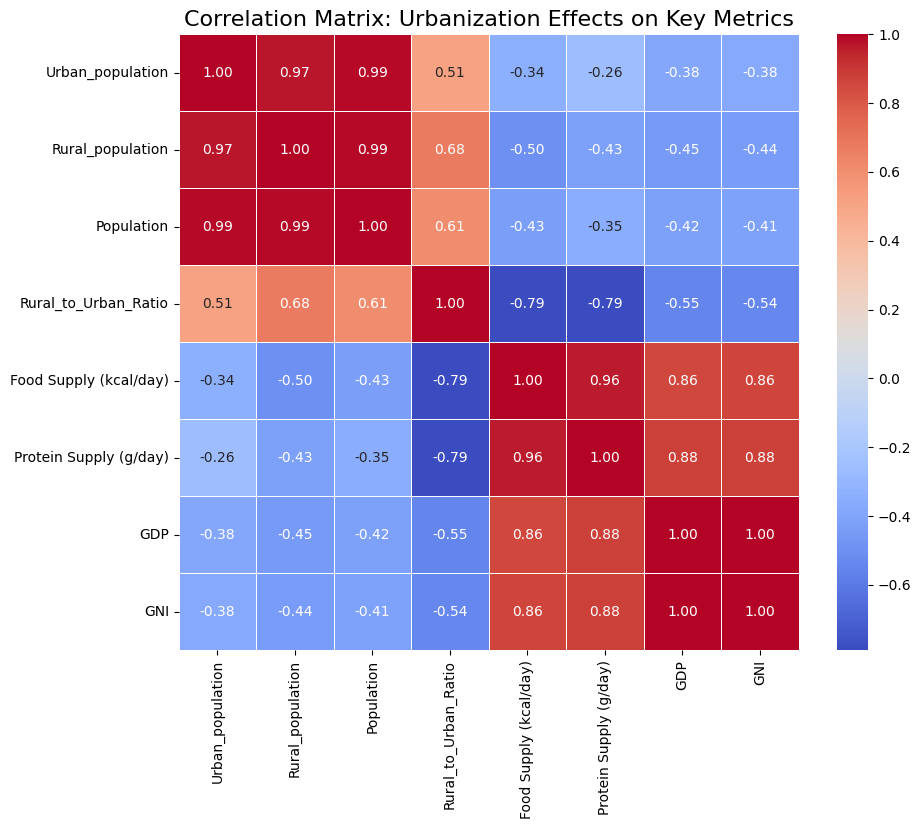

,Urban_population,Rural_population,Population,Rural_to_Urban_Ratio,Food Supply (kcal/day),Protein Supply (g/day),GDP,GNI
Urban_population,1.000000,0.967182,0.990515,0.510956,-0.340530,-0.261872,-0.384613,-0.375983
Rural_population,0.967182,1.000000,0.992914,0.677370,-0.499859,-0.425699,-0.451584,-0.444939
Population,0.990515,0.992914,1.000000,0.605042,-0.428481,-0.351452,-0.422247,-0.414622
Rural_to_Urban_Ratio,0.510956,0.677370,0.605042,1.000000,-0.790152,-0.787304,-0.546699,-0.544450
Food Supply (kcal/day),-0.340530,-0.499859,-0.428481,-0.790152,1.000000,0.960021,0.856655,0.864032
Protein Supply (g/day),-0.261872,-0.425699,-0.351452,-0.787304,0.960021,1.000000,0.876847,0.878322
GDP,-0.384613,-0.451584,-0.422247,-0.546699,0.856655,0.876847,1.000000,0.999557
GNI,-0.375983,-0.444939,-0.414622,-0.544450,0.864032,0.878322,0.999557,1.000000


In [ ]:

collected_data['Rural_to_Urban_Ratio'] = collected_data['Rural_population'] / collected_data['Urban_population']

urbanization_data = collected_data[[
    "Urban_population",
    "Rural_population",
    "Population",
    "Rural_to_Urban_Ratio",
    "Food Supply (kcal/day)",
    "Protein Supply (g/day)",
    "GDP",
    "GNI"
]]

urbanization_correlation = urbanization_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    urbanization_correlation,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix: Urbanization Effects on Key Metrics", fontsize=16)
plt.show()


urbanization_correlation


In [ ]:
collected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  84 non-null     object 
 1   Year                    84 non-null     int64  
 2   Rural_population        84 non-null     float64
 3   Population              84 non-null     float64
 4   Female_population       84 non-null     float64
 5   Male_population         84 non-null     float64
 6   Urban_population        84 non-null     float64
 7   Food supply (kcal)      84 non-null     float64
 8   Food Supply (kcal/day)  84 non-null     float64
 9   Protein Supply (g/day)  84 non-null     float64
 10  Protein Supply (tons)   84 non-null     float64
 11  Undernourished_People   84 non-null     float64
 12  Undernourishment_Scale  84 non-null     object 
 13  GDP                     84 non-null     float64
 14  GNI                     84 non-null     floa



> Correlation between Protein Supply and Total Food Supply





Correlation between Protein Supply and Total Food Supply:
                        Protein Supply (g/day)  Food Supply (kcal/day)
Protein Supply (g/day)                1.000000                0.960021
Food Supply (kcal/day)                0.960021                1.000000


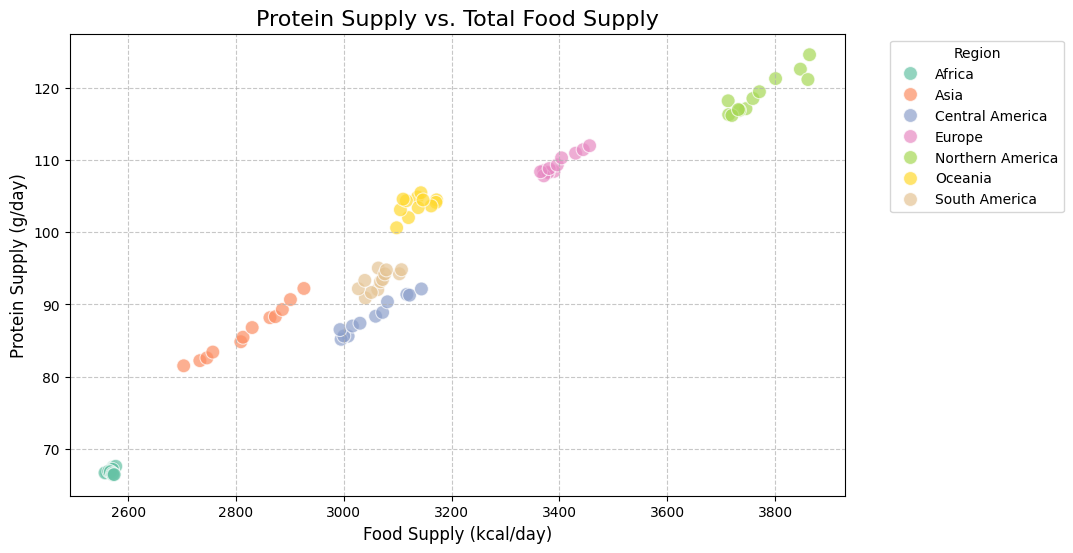

In [ ]:
protein_food_correlation = collected_data[["Protein Supply (g/day)", "Food Supply (kcal/day)"]].corr()

# Display the correlation
print("Correlation between Protein Supply and Total Food Supply:")
print(protein_food_correlation)

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=collected_data,
    x="Food Supply (kcal/day)",
    y="Protein Supply (g/day)",
    hue="Region",
    palette="Set2",
    alpha=0.7,
    s=100
)
plt.title("Protein Supply vs. Total Food Supply", fontsize=16)
plt.xlabel("Food Supply (kcal/day)", fontsize=12)
plt.ylabel("Protein Supply (g/day)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


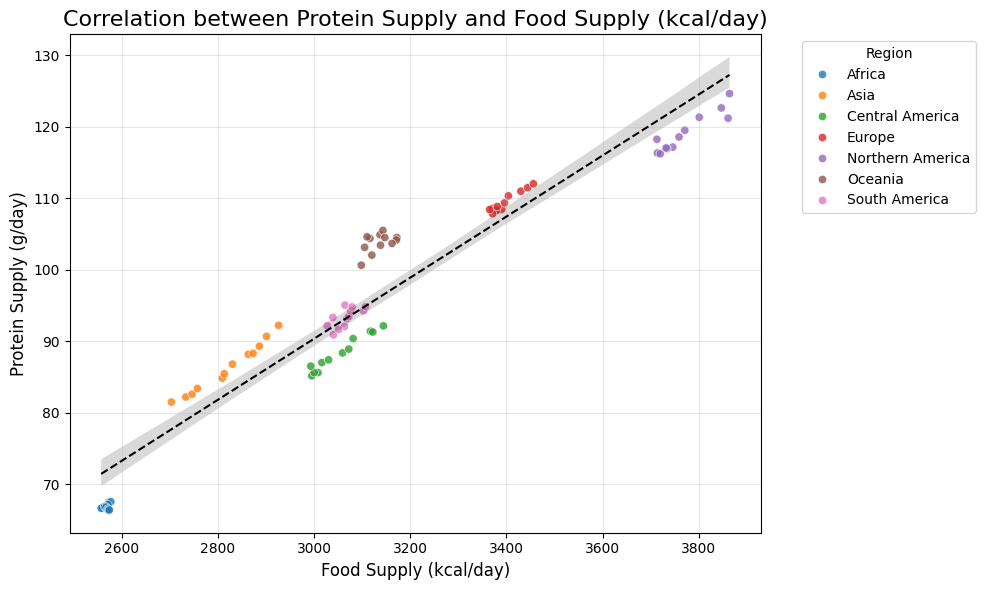

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation between Food Supply (kcal/day) and Protein Supply (g/day)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=collected_data['Food Supply (kcal/day)'],
    y=collected_data['Protein Supply (g/day)'],
    hue=collected_data['Region'],
    palette='tab10',
    alpha=0.8
)
sns.regplot(
    x=collected_data['Food Supply (kcal/day)'],
    y=collected_data['Protein Supply (g/day)'],
    scatter=False,
    color='black',
    line_kws={"linestyle": "dashed", "linewidth": 1.5}
)
plt.title('Correlation between Protein Supply and Food Supply (kcal/day)', fontsize=16)
plt.xlabel('Food Supply (kcal/day)', fontsize=12)
plt.ylabel('Protein Supply (g/day)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




> Correlation Between Food Supply and Protein Supply Across Regions




In [ ]:
regional_correlations = (
    collected_data
    .groupby("Region")[["Food Supply (kcal/day)", "Protein Supply (g/day)"]]
    .corr()
    .iloc[0::2, 1]  # Extracting correlation between Food Supply and Protein Supply
    .reset_index()
    .rename(columns={"Protein Supply (g/day)": "Correlation", "level_1": "Metric"})
)

# Filter to only include relevant correlations
regional_correlations = regional_correlations[regional_correlations["Metric"] == "Food Supply (kcal/day)"]

In [ ]:

fig = px.bar(
    regional_correlations,
    x="Region",
    y="Correlation",
    color="Region",
    text="Correlation",
    color_continuous_scale="Viridis",
    title="Correlation Between Food Supply and Protein Supply Across Regions",
    labels={"Correlation": "Correlation Coefficient"}
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Correlation Coefficient",
    yaxis=dict(range=[-1, 1]),  # Correlation range
    title_font_size=16,
    font=dict(size=12),
    showlegend=False
)

fig.show()







>





>Relationship Between GDP and Protein Supply



Correlation between GDP and Protein Supply:
                             GDP  Protein Supply (g/day)
GDP                     1.000000                0.876847
Protein Supply (g/day)  0.876847                1.000000


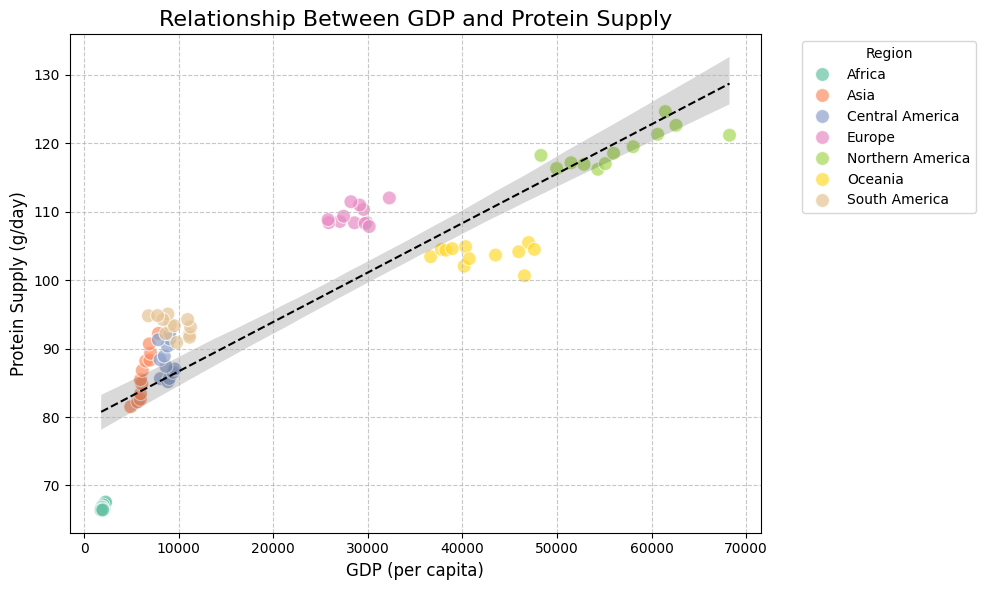

In [ ]:
# Calculating the correlation between GDP and Protein Supply
gdp_protein_correlation = collected_data[["GDP", "Protein Supply (g/day)"]].corr()


print("Correlation between GDP and Protein Supply:")
print(gdp_protein_correlation)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=collected_data,
    x="GDP",
    y="Protein Supply (g/day)",
    hue="Region",
    palette="Set2",
    alpha=0.7,
    s=100
)
sns.regplot(
    data=collected_data,
    x="GDP",
    y="Protein Supply (g/day)",
    scatter=False,
    color="black",
    line_kws={"linestyle": "dashed", "linewidth": 1.5}
)
plt.title("Relationship Between GDP and Protein Supply", fontsize=16)
plt.xlabel("GDP (per capita)", fontsize=12)
plt.ylabel("Protein Supply (g/day)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




> Correlation Between Protein Supply and Metrics (Undernourished People, GDP, GNI



Correlation DataFrame:
   Undernourishment_Scale                 Metric  Correlation  \
1                     Low  Undernourished_People    -0.973611   
2                     Low                    GDP     0.943950   
3                     Low                    GNI     0.944840   
5                Moderate  Undernourished_People     0.767674   
6                Moderate                    GDP    -0.027737   
7                Moderate                    GNI    -0.026824   
9                  Severe  Undernourished_People     0.474078   
10                 Severe                    GDP     0.916640   
11                 Severe                    GNI     0.914052   

    Undernourished_People       GDP       GNI  
1                1.000000 -0.979908 -0.980719  
2               -0.979908  1.000000  0.999869  
3               -0.980719  0.999869  1.000000  
5                1.000000 -0.191699 -0.196928  
6               -0.191699  1.000000  0.999233  
7               -0.196928  0.999233  1

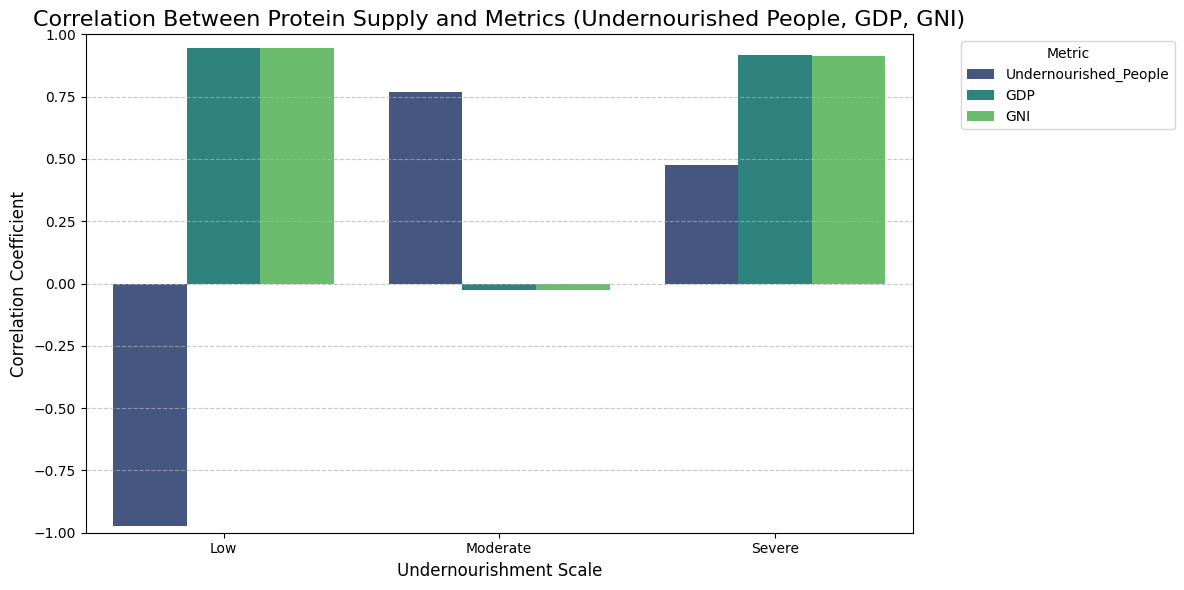

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation metrics
correlation_protein_undernourished_gdp_gni = (
    collected_data.groupby("Undernourishment_Scale")[["Protein Supply (g/day)", "Undernourished_People", "GDP", "GNI"]]
    .corr()
    .reset_index()
)

# Filter for correlations with Protein Supply (g/day)
correlation_protein_undernourished_gdp_gni = correlation_protein_undernourished_gdp_gni[
    (correlation_protein_undernourished_gdp_gni["level_1"] != "Protein Supply (g/day)")
]

# Rename columns for clarity
correlation_protein_undernourished_gdp_gni = correlation_protein_undernourished_gdp_gni.rename(
    columns={"level_1": "Metric", "Protein Supply (g/day)": "Correlation"}
)

# Debug: Check the DataFrame structure
print("Correlation DataFrame:")
print(correlation_protein_undernourished_gdp_gni)

# Plot correlation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=correlation_protein_undernourished_gdp_gni,
    x="Undernourishment_Scale",
    y="Correlation",
    hue="Metric",
    palette="viridis"
)
plt.title("Correlation Between Protein Supply and Metrics (Undernourished People, GDP, GNI)", fontsize=16)
plt.xlabel("Undernourishment Scale", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.ylim(-1, 1)  # Correlation range
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



# Outliers in Protein Supply (g/day) Across Regions


Saving collected_data.csv to collected_data (2).csv


<ipython-input-32-7609a4311c1e>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




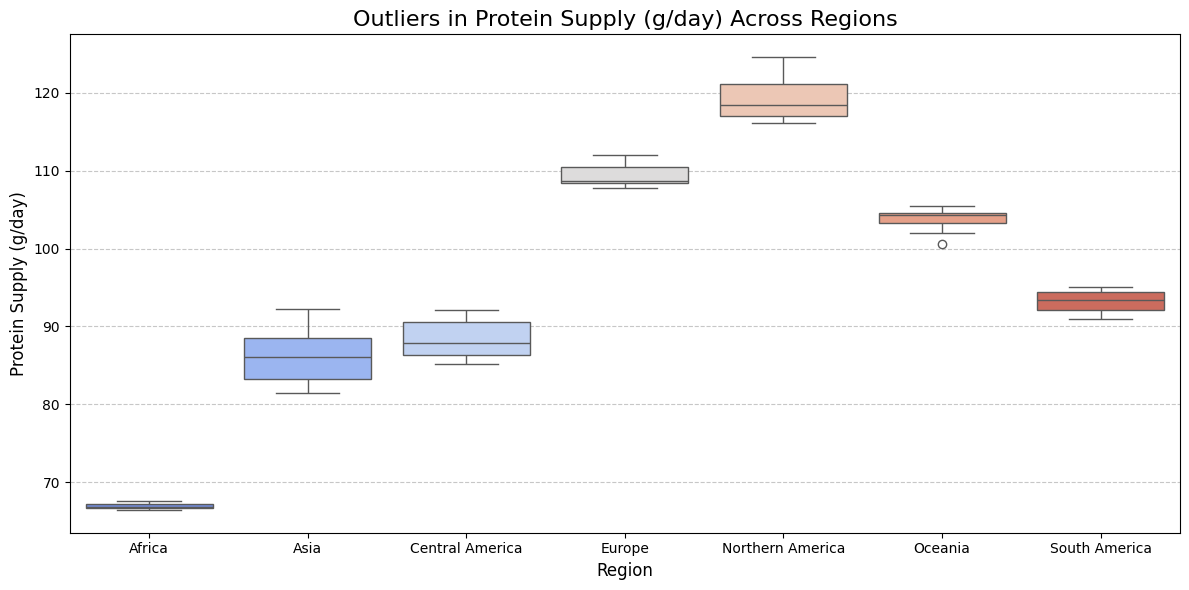

Outliers in Protein Supply:
              Region  Year  Protein Supply (g/day)           GDP           GNI
0             Africa  2010                   66.69   1943.618265   1887.636832
6             Africa  2016                   66.66   1837.010359   1776.701189
9             Africa  2019                   66.57   1942.458294   1874.107676
10            Africa  2020                   66.40   1801.177923   1747.515534
11            Africa  2021                   66.42   1964.499025   1899.726817
55  Northern America  2017                  119.49  58045.390815  59109.868037
56  Northern America  2018                  121.31  60634.938727  61656.748313
57  Northern America  2019                  122.62  62574.850056  63556.457837
58  Northern America  2020                  124.62  61453.460155  62534.065423
59  Northern America  2021                  121.18  68233.005780  69016.493665

Regions with Extreme GDP:
              Region  Year  Protein Supply (g/day)           GDP           G

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()

collected_data = pd.read_csv('collected_data.csv')

# Defining thresholds for outliers (e.g., lower and upper 5% for each metric)
protein_lower_threshold = collected_data["Protein Supply (g/day)"].quantile(0.05)
protein_upper_threshold = collected_data["Protein Supply (g/day)"].quantile(0.95)
gdp_upper_threshold = collected_data["GDP"].quantile(0.95)
gdp_lower_threshold = collected_data["GDP"].quantile(0.05)
gni_upper_threshold = collected_data["GNI"].quantile(0.95)
gni_lower_threshold = collected_data["GNI"].quantile(0.05)

# Filtering for potential outliers in Protein Supply
outliers_protein = collected_data[
    (collected_data["Protein Supply (g/day)"] < protein_lower_threshold) |
    (collected_data["Protein Supply (g/day)"] > protein_upper_threshold)
]

# Investigating regions with extreme GDP and GNI
gdp_outliers = collected_data[
    (collected_data["GDP"] > gdp_upper_threshold) |
    (collected_data["GDP"] < gdp_lower_threshold)
]

gni_outliers = collected_data[
    (collected_data["GNI"] > gni_upper_threshold) |
    (collected_data["GNI"] < gni_lower_threshold)
]


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=collected_data,
    x="Region",
    y="Protein Supply (g/day)",
    palette="coolwarm"
)
plt.title("Outliers in Protein Supply (g/day) Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Protein Supply (g/day)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


print("Outliers in Protein Supply:")
print(outliers_protein[["Region", "Year", "Protein Supply (g/day)", "GDP", "GNI"]])

print("\nRegions with Extreme GDP:")
print(gdp_outliers[["Region", "Year", "Protein Supply (g/day)", "GDP", "GNI"]])

print("\nRegions with Extreme GNI:")
print(gni_outliers[["Region", "Year", "Protein Supply (g/day)", "GDP", "GNI"]])

# Variability Analysis:

Calculate the range or standard deviation of protein supply for each region to identify regions with high consistency or disparities.

> Calculating the range or standard deviation of protein supply for each region to identify regions with high consistency or disparities.


>Analyzing differences in GDP, GNI, and Undernourishment by disparity group







>Calculate standard deviation of Protein Supply (g/day) for each region



In [ ]:
protein_supply_variability = (
    collected_data.groupby("Region")["Protein Supply (g/day)"]
    .agg(["mean", "std", "min", "max"])
    .reset_index()
    .rename(columns={"std": "Variability (std)", "mean": "Mean Protein Supply"})
)

# Adding a column to identify regions with high disparities
protein_supply_variability["High_Disparity"] = protein_supply_variability["Variability (std)"] > protein_supply_variability["Variability (std)"].mean()
median_variability = protein_supply_variability["Variability (std)"].median()
protein_supply_variability["Disparity"] = protein_supply_variability["Variability (std)"] > median_variability

print(protein_supply_variability)


             Region  Mean Protein Supply  Variability (std)     min     max  \
0            Africa            66.887500           0.398135   66.40   67.57   
1              Asia            86.289167           3.513934   81.50   92.22   
2   Central America            88.318333           2.483084   85.17   92.15   
3            Europe           109.404167           1.415341  107.83  112.01   
4  Northern America           119.133333           2.735761  116.20  124.62   
5           Oceania           103.781667           1.343827  100.63  105.49   
6     South America            93.325000           1.370564   90.90   95.05   

   High_Disparity  Disparity  
0           False      False  
1            True       True  
2            True       True  
3           False      False  
4            True       True  
5           False      False  
6           False      False  


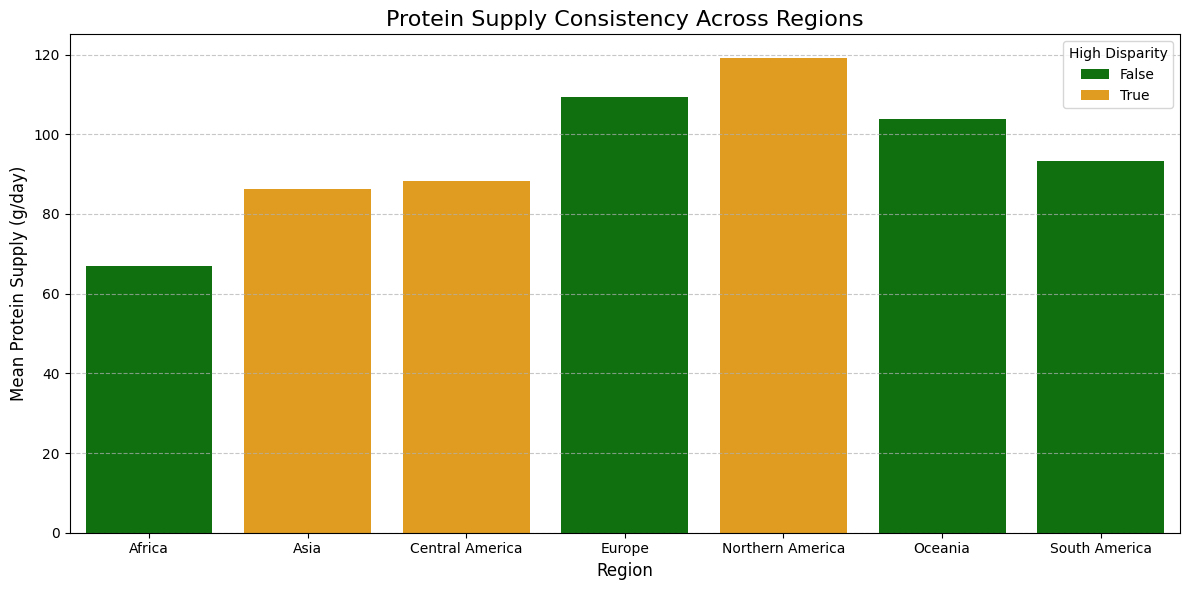

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mean protein supply and variability
plt.figure(figsize=(12, 6))
sns.barplot(
    data=protein_supply_variability,
    x="Region",
    y="Mean Protein Supply",
    hue="Disparity",
    palette=["green", "orange"]
)
plt.title("Protein Supply Consistency Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Mean Protein Supply (g/day)", fontsize=12)
plt.legend(title="High Disparity")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Analyzing differences in GDP, GNI, and Undernourishment by disparity group
disparity_analysis = (
    collected_data.merge(protein_supply_variability[["Region", "Disparity"]], on="Region")
    .groupby("Disparity")[["GDP", "GNI", "Undernourished_People", "Urban_population"]]
    .mean()
    .reset_index()
)

print(disparity_analysis)


   Disparity           GDP           GNI  Undernourished_People  \
0      False  20504.675484  20111.653372             153.022917   
1       True  23878.101383  24109.256909             205.866667   

   Urban_population  
0     357135.379208  
1     854793.804222  


In [ ]:
# Merging disparity labels with collected data
collected_data_with_disparity = collected_data.merge(
    protein_supply_variability[["Region", "Disparity"]], on="Region"
)

# Aggregating socioeconomic metrics by disparity
disparity_analysis = (
    collected_data_with_disparity.groupby("Disparity")[["GDP", "GNI", "Undernourished_People", "Urban_population"]]
    .mean()
    .reset_index()
    .rename(columns={
        "Disparity": "High Variability",
        "Undernourished_People": "Mean Undernourished People",
        "Urban_population": "Mean Urban Population"
    })
)

print(disparity_analysis)


   High Variability           GDP           GNI  Mean Undernourished People  \
0             False  20504.675484  20111.653372                  153.022917   
1              True  23878.101383  24109.256909                  205.866667   

   Mean Urban Population  
0          357135.379208  
1          854793.804222  


In [ ]:
print(disparity_analysis.columns)


Index(['High Variability', 'GDP', 'GNI', 'Mean Undernourished People',
       'Mean Urban Population'],
      dtype='object')


<ipython-input-43-c07ec292c0ec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-43-c07ec292c0ec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-43-c07ec292c0ec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-43-c07ec292c0ec>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




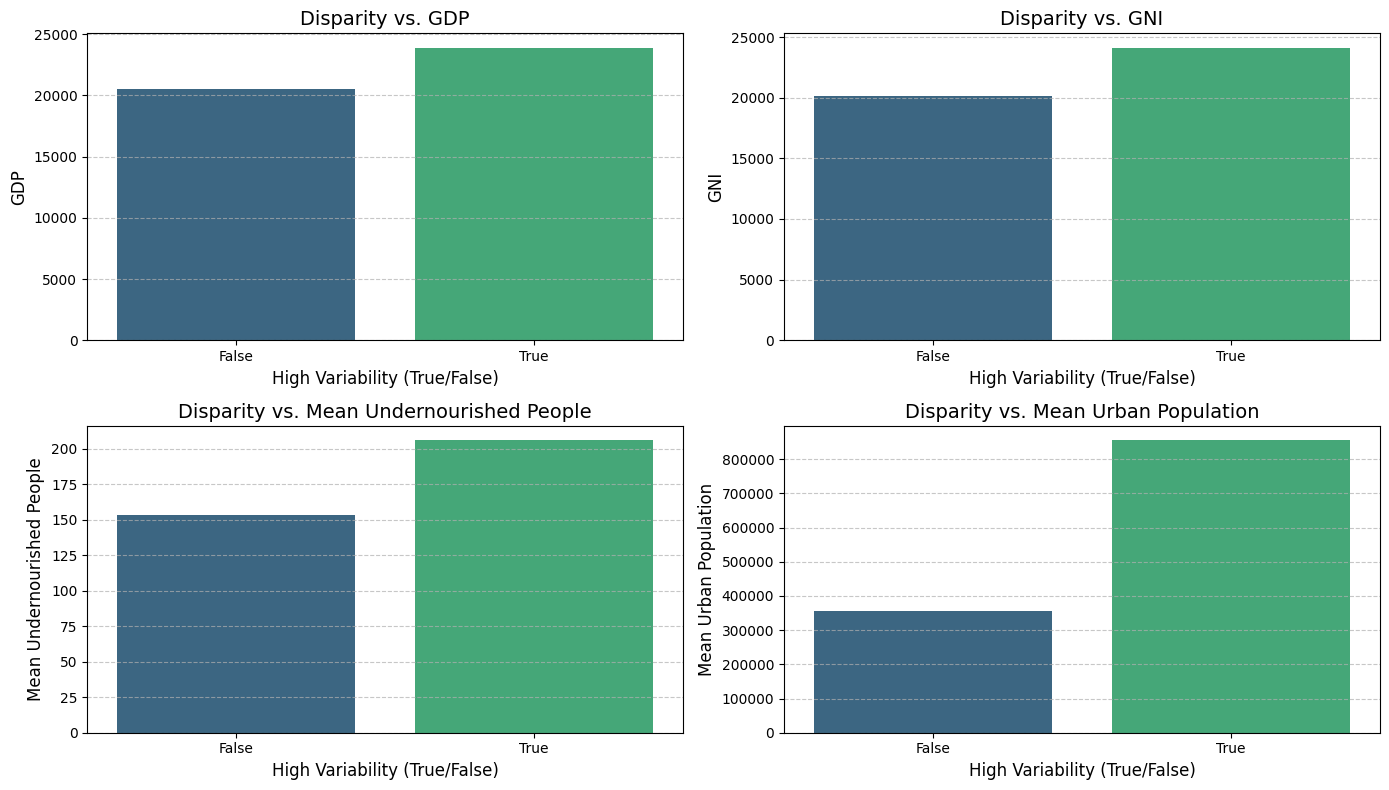

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
metrics = ["GDP", "GNI", "Mean Undernourished People", "Mean Urban Population"]
plt.figure(figsize=(14, 8))

# Plot each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(
        data=disparity_analysis,
        x="High Variability",
        y=metric,
        palette="viridis"
    )
    plt.title(f"Disparity vs. {metric}", fontsize=14)
    plt.xlabel("High Variability (True/False)", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()






> 1. Disparity vs. GDP
  Observation: Regions with high variability in protein supply ("True") tend to have higher GDP values on average compared to regions with consistent protein supply.
  Implication: A higher GDP does not necessarily ensure consistent protein supply. This could be due to income inequality or uneven resource distribution within regions.

  2. Disparity vs. GNI
  Observation: Similar to GDP, regions with high variability also have higher GNI values.
  Implication: While economic output (GDP and GNI) is higher in these regions, the benefits might not be distributed evenly, leading to disparities in nutrition access and protein supply.

  3. Disparity vs. Mean Undernourished People
  Observation: Regions with higher protein supply variability tend to have more undernourished people on average.
  Implication: High variability in protein supply correlates with increased levels of undernourishment. This highlights how supply inconsistencies may directly impact nutritional health.

  4. Disparity vs. Mean Urban Population
  Observation: Regions with high variability in protein supply also show higher urban population levels on average.
  Implication: Urbanization might contribute to disparities due to challenges in food distribution systems, affordability, or access to diverse food sources in densely populated areas.






#7. Predictive Insights


*   Performance of predictive models
*   Feature importance: Key predictors for protein intake trends



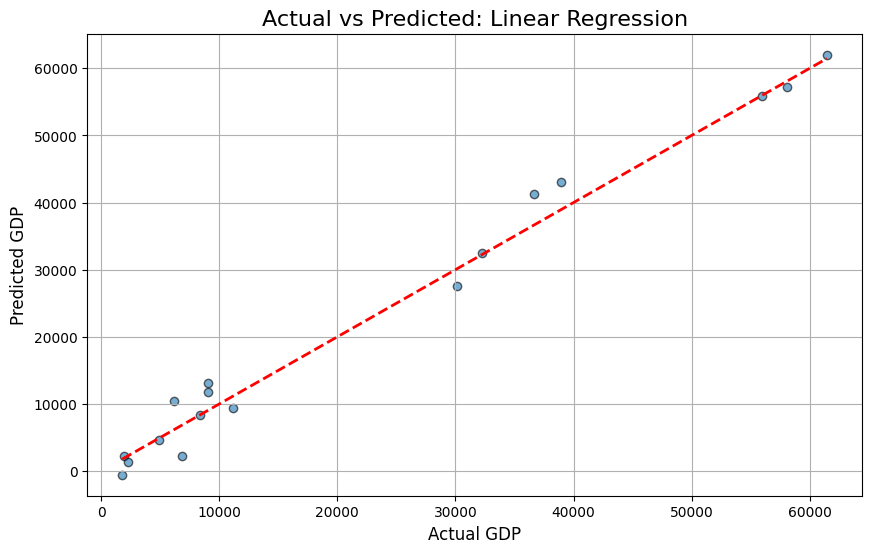

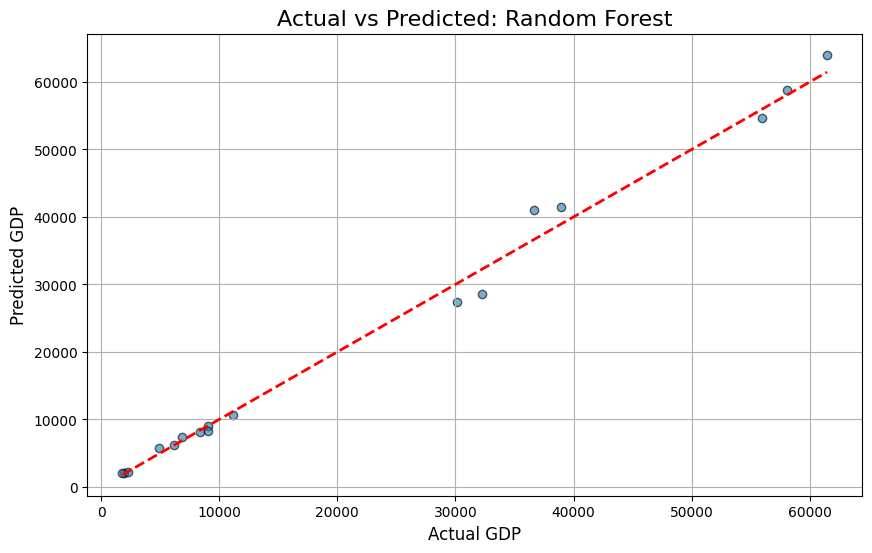

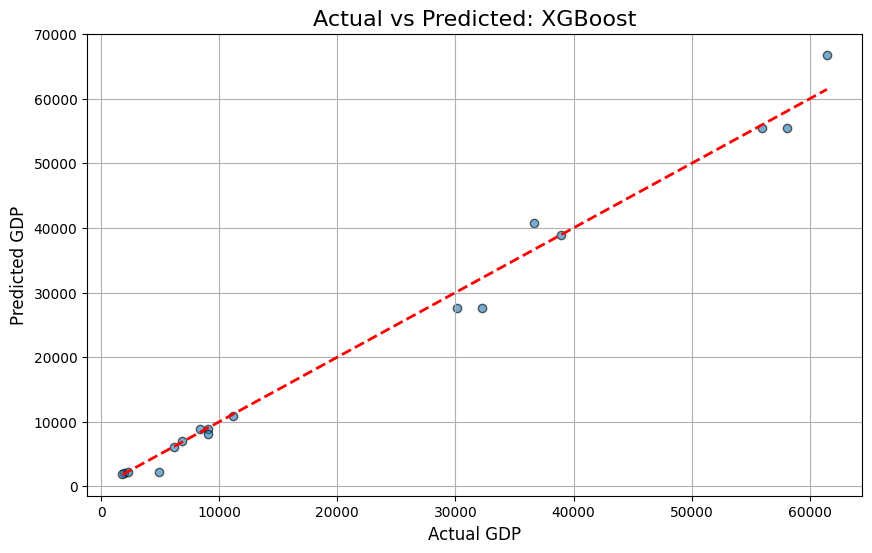

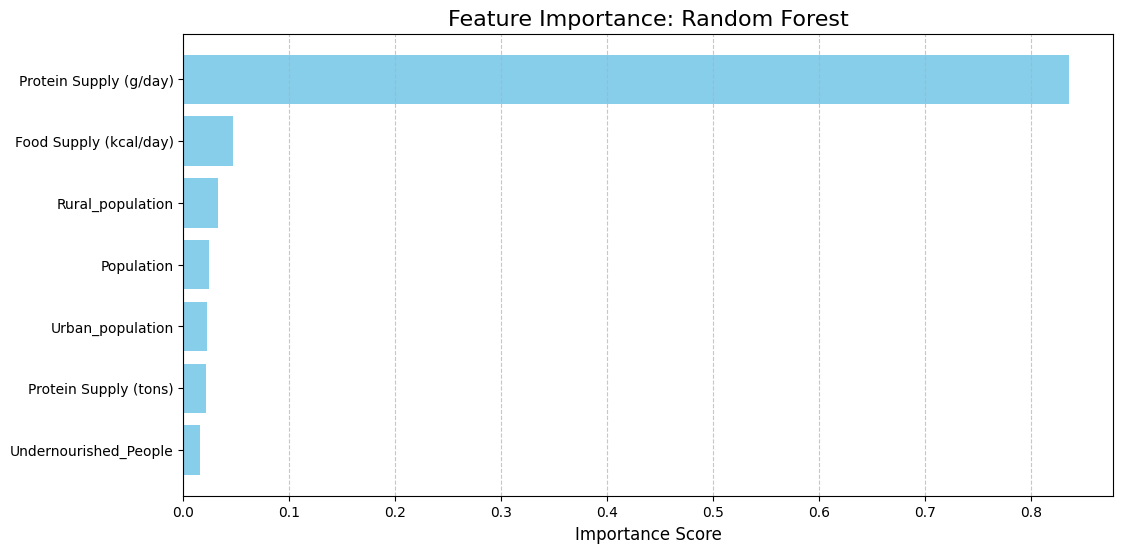

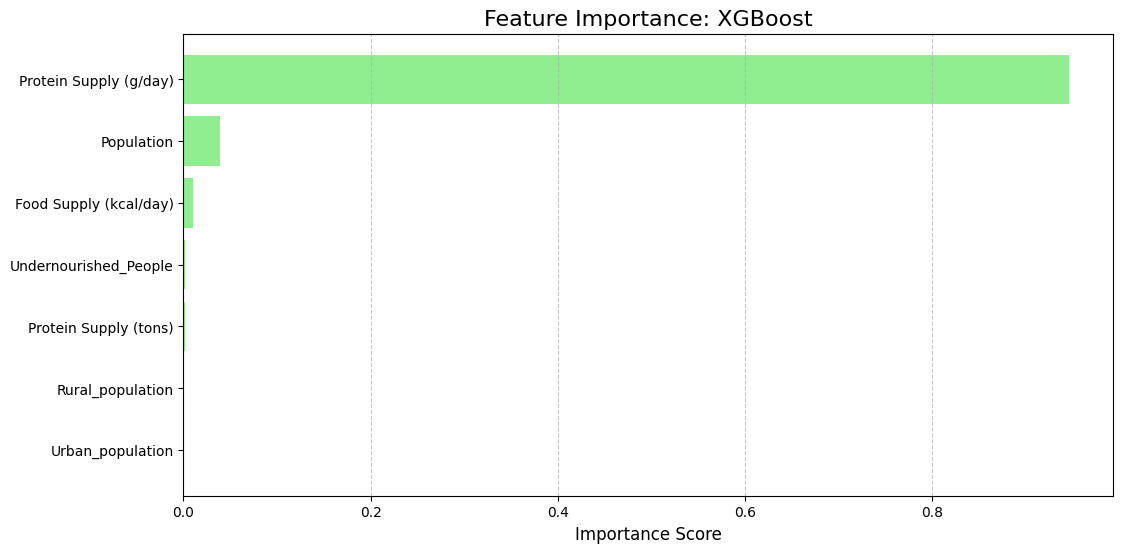

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


# Selecting features and target
selected_features = [
    'Population', 'Rural_population', 'Urban_population',
    'Food Supply (kcal/day)', 'Protein Supply (g/day)', 'Protein Supply (tons)', 'Undernourished_People'
]
target_variable = 'GDP'
model_data = collected_data[selected_features + [target_variable]].apply(pd.to_numeric, errors='coerce').dropna()

X = model_data[selected_features]
y = model_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
xgboost_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)

# Metrics Calculation
evaluation_metrics = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R²": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linear),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_linear)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ]
}
metrics_df = pd.DataFrame(evaluation_metrics)


# Linear Regression: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted: Linear Regression', fontsize=16)
plt.xlabel('Actual GDP', fontsize=12)
plt.ylabel('Predicted GDP', fontsize=12)
plt.grid(True)
plt.show()

# Random Forest: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted: Random Forest', fontsize=16)
plt.xlabel('Actual GDP', fontsize=12)
plt.ylabel('Predicted GDP', fontsize=12)
plt.grid(True)
plt.show()

# XGBoost: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted: XGBoost', fontsize=16)
plt.xlabel('Actual GDP', fontsize=12)
plt.ylabel('Predicted GDP', fontsize=12)
plt.grid(True)
plt.show()

# Feature Importance for Random Forest
feature_importance_rf = random_forest_model.feature_importances_
importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'], color='skyblue')
plt.title('Feature Importance: Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Feature Importance for XGBoost
feature_importance_xgb = xgboost_model.feature_importances_
importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color='lightgreen')
plt.title('Feature Importance: XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()





> Key Insights from Predictions
  Dominant Features:

  Protein Supply (g/day) is consistently the most important predictor across models, highlighting the link between nutrition and GDP.
  Food Supply (kcal/day) and Population factors play complementary roles in explaining GDP variance.
  Lower GDP Predictions:

  Linear Regression struggles the most in this range, while Random Forest and XGBoost perform better.
  Lower GDP predictions tend to have more variability due to potentially unmodeled factors.
  Higher GDP Predictions:

  All models, including Linear Regression, perform well in this range. Predictions align closely with actual values.




# Conclusion and Recommendations



>

**Regional Disparities in Protein Supply:**

Africa:
Africa has the lowest protein supply, with a very narrow range. This indicates consistently low protein intake across the region.

Asia:
Asia shows a wider range, but protein supply values are generally moderate, with no extreme outliers.

Central and South America:
Both regions have higher protein supply compared to Africa and Asia, with Central America exhibiting a slightly tighter distribution.

Europe and Northern America:
These regions have the highest protein supply, with narrow ranges indicating consistent protein availability across the region.
Northern America has slightly higher values compared to Europe, and no significant outliers are observed.

Oceania:
Oceania has moderate protein supply levels but displays some variability, including an outlier (lower protein supply) suggesting disparities within the region.
Outliers:

Oceania:
The presence of a lower outlier suggests potential disparities within countries in the region, where certain countries might have significantly less protein availability.
South America:
The protein supply is generally high, with a consistent range.
Key Observations:

Africa consistently lags in protein supply compared to other regions.
Wealthier regions (e.g., Northern America and Europe) show higher and more consistent protein supply, aligning with better access to food resources.
Oceania shows some disparities that warrant further investigation into specific countries contributing to the outlier.

Linear Regression:

Performance: The model captures the general trend in GDP but struggles with accuracy, especially for lower GDP values.
Errors: Deviations between actual and predicted values increase for smaller GDP, indicating potential unaccounted non-linear relationships.
Prediction Usefulness: Best suited for high GDP regions or scenarios with strong linear correlations.
Random Forest:

Performance: Significant improvement over Linear Regression, with higher accuracy and better handling of lower GDP values.
Prediction Strengths: Captures interactions between features, making it robust for varying GDP ranges.
Feature Insights:
GDP is most influenced by "Protein Supply (g/day)" and "Food Supply (kcal/day)".
Population-based variables (e.g., "Urban_population") play secondary roles.
XGBoost:

Performance: The most accurate model, showing the highest R² (explaining the largest variance in GDP).
Error Minimization: Performs exceptionally well across both high and low GDP ranges.
Feature Insights:
Similar to Random Forest, "Protein Supply (g/day)" dominates, followed by other food supply and population features.
Prediction Usefulness: Highly reliable across diverse GDP levels and for datasets with complex interactions.

---

Impact of Regions on Predictions
Economic Diversity:

High-Income Regions (e.g., Europe, North America):
These regions have higher GDP and GNI values, consistent food and protein supply, and minimal undernourishment.
Predictions in these regions are more accurate because the data distribution aligns well with the overall trends captured by the models.
Low-Income Regions (e.g., Africa, parts of Asia):
These regions have lower GDP, lower food/protein supply, and higher undernourishment, leading to a more diverse and skewed data distribution.
Predictions are less accurate in these regions because of greater variability in the underlying features.
Feature Relevance by Region:

In wealthier regions:
Protein Supply (g/day) and Food Supply (kcal/day) are strong predictors of GDP due to better resource distribution and infrastructure.
In lower-income regions:
Factors like Undernourished People and Rural Population have a stronger influence because they reflect systemic challenges that directly impact GDP.
Prediction Variance:

Wealthier Regions:
The models perform better due to well-aligned and linear relationships between features and GDP (e.g., higher food supply always aligns with higher GDP).
Lower-Income Regions:
Greater prediction errors occur due to non-linear patterns, high variability, and the influence of external factors (e.g., political instability, natural disasters).
Model-Specific Impact:

Linear Regression:
Struggles in regions with high variability (e.g., Africa), as it cannot capture non-linear relationships effectively.
Random Forest & XGBoost:
Perform better in capturing regional differences due to their ability to model non-linear interactions.


This plot is a pairplot or scatterplot matrix, which displays the pairwise relationships between different variables in the dataset. Additionally, the data is colored by the categorical variable "Region," allowing regional patterns to be visualized. Here’s how to interpret the relationships:

Key Insights:
GDP vs. Other Variables:

GDP vs. GNI:
A strong linear relationship exists, indicating that GDP and GNI are highly correlated. This is expected as both are measures of national income.
GDP vs. Undernourished People:
A negative trend is visible, particularly for certain regions like Africa, suggesting that as GDP increases, the number of undernourished people tends to decrease.
GDP vs. Protein Supply (g/day):
A positive linear trend is observed, especially for wealthier regions (e.g., Europe and North America). Higher GDP correlates with better protein supply.
GDP vs. Food Supply (kcal/day):
Similar to protein supply, higher food supply aligns with higher GDP values.
Region-Specific Patterns:

Africa:
Clusters at the lower end of GDP, GNI, and food/protein supply. Africa also shows higher values for undernourished populations.
Europe & North America:
Positioned at the upper end of GDP, GNI, and food/protein supply distributions. Undernourishment is negligible.
Asia:
Shows a wide range of GDP and GNI, indicating diverse economic conditions within the region.
South America:
Falls in the mid-range for most indicators, with relatively balanced nutrition and GDP levels.
Population Variables:

Urban Population vs. Total Population:
Strong positive correlation across all regions, reflecting higher urbanization levels in wealthier regions like Europe and North America.
Rural Population vs. Undernourishment:
Higher rural populations correlate with more undernourished people, particularly in lower-income regions like Africa.
Nutrition and Economic Health:

Regions with higher GDP (e.g., Europe, North America) tend to have better nutrition (higher food and protein supply) and minimal undernourishment.
Regions with lower GDP (e.g., Africa) show a significant challenge in nutrition, with lower food/protein supply and higher undernourishment.
Overall Observations:
Positive Correlations: GDP and GNI show strong positive correlations with nutrition indicators like food and protein supply.
Negative Correlations: GDP and GNI negatively correlate with undernourished populations, reflecting improved economic and social health with higher income.
Regional Disparities: Economic and nutritional disparities between regions are evident, with Africa and parts of Asia facing more challenges compared to wealthier regions.


